# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries

In [2]:
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    ShuffleSplit,
    StratifiedShuffleSplit,
    cross_validate,
    train_test_split
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Data Loading

In [3]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
X_train = df.drop("target", axis=1)
y = df["target"]

# Exploratory Data Analysis (EDA) and Preprocessing

In [4]:
X_train.shape

(100000, 75)

In [5]:
X_test.shape

(10000, 75)

In [6]:
X_train.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,13224.0,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11


In [7]:
X_test.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12


### Exploring Null values in Training Dataset

In [8]:
# Changing Default Option to see every column.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [9]:

# Percentage of  Null Values in the Dataset
print((X_train.isna().sum() / len(X_train) * 100).round(2))

MachineID                             0.00
ProductName                           0.00
EngineVersion                         0.00
AppVersion                            0.00
SignatureVersion                      0.00
IsBetaUser                            0.00
RealTimeProtectionState               0.07
IsPassiveModeEnabled                  0.00
AntivirusConfigID                     0.08
NumAntivirusProductsInstalled         0.08
NumAntivirusProductsEnabled           0.08
HasTpm                                0.00
CountryID                             0.00
CityID                                0.62
GeoRegionID                           0.00
LocaleEnglishNameID                   0.00
PlatformType                          0.00
Processor                             0.00
OSVersion                             0.00
OSBuildNumber                         0.00
OSProductSuite                        0.00
OsPlatformSubRelease                  0.00
OSBuildLab                            0.00
SKUEditionN

#### Insights
- Data Quality: The dataset is alomost complete. This suggest us that the overall data quality is good.

- Key Areas of Focus: The features with the most missing data are SMode(0.98) and CityID(0.62). While these percentages are still low.

- Minimal Impact: Since the percentage of missing data is very low, this suggest us that simple imputer is enough to handle these.

### Exploring Columns

In [10]:
X_train.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [11]:
X_train.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0,13224.0,0,0.0,

## Working on Columns One at a Time


## 1. MachineID

In [12]:
X_train["MachineID"].head()

0    f541bae429089117c4aac39c90dd3416
1    dc2b14d9ce3a0ce4050bb640190f2ca5
2    fd20c5f010e9c5f91ad1c6b3e0da68a0
3    38711eae85eb77a72ec5dfdf27eb2a76
4    32607c9a543a9214e2c7e45800ed4849
Name: MachineID, dtype: object

Droping **MachineID** beacause it is unique identifier thus not relevant for prediction.

In [13]:
X_train = X_train.drop('MachineID', axis=1)
X_test = X_test.drop('MachineID', axis=1)

## 2. ProductName

In [14]:
X_train["ProductName"].value_counts()

ProductName
win8defender    99771
mse               229
Name: count, dtype: int64

In [15]:
X_test["ProductName"].value_counts()

ProductName
win8defender    9972
mse               28
Name: count, dtype: int64

### Analysing ProductName with Graphs

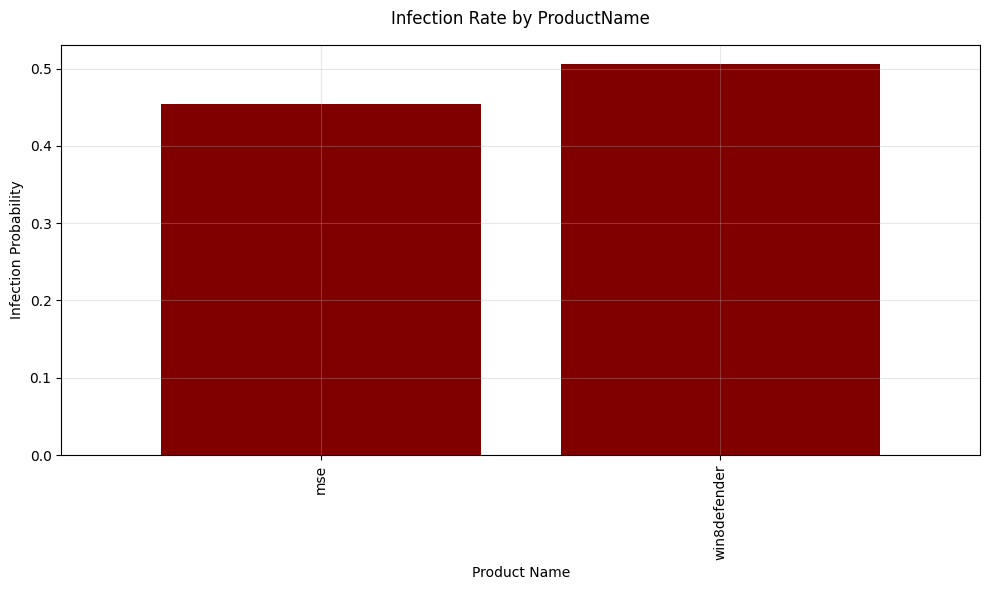

In [16]:
plt.figure(figsize=(10, 6))

infection_rates = df.groupby('ProductName')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by ProductName', pad=15)
plt.xlabel('Product Name')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Since Probablity of Infection are similar, and mse are very low, So it is good to drop this feature also.

In [17]:
X_train = X_train.drop('ProductName', axis=1)
X_test = X_test.drop('ProductName', axis=1)

## 3. EngineVersion

In [18]:
X_train["EngineVersion"].value_counts()

EngineVersion
1.1.15200.1    45219
1.1.15100.1    44017
1.1.15000.2     3169
1.1.14901.4     2597
1.1.14800.3     1719
1.1.15300.6      650
1.1.14700.5      593
1.1.14600.4      569
1.1.14104.0      328
1.1.15300.5      255
1.1.13504.0      212
1.1.14500.5      124
1.1.14405.2       82
1.1.14306.0       56
1.1.14202.0       50
1.1.14003.0       34
1.1.13804.0       33
1.1.13903.0       28
1.1.13303.0       27
1.1.13601.0       26
1.1.13407.0       23
1.1.15000.1       22
1.1.14901.3       22
1.1.13103.0       20
1.1.14305.0       17
1.1.14700.4       16
1.1.12902.0       15
1.1.13704.0       15
1.1.13701.0       15
1.1.13202.0       14
1.1.13000.0       10
1.1.14700.3        9
1.1.14800.1        7
1.1.14500.2        3
1.1.12805.0        2
1.1.13802.0        1
1.1.13803.0        1
Name: count, dtype: int64

In [19]:
X_test["EngineVersion"].value_counts()

EngineVersion
1.1.15200.1    4501
1.1.15100.1    4478
1.1.15000.2     297
1.1.14901.4     251
1.1.14800.3     162
1.1.14700.5      60
1.1.14600.4      52
1.1.15300.6      50
1.1.15300.5      35
1.1.14104.0      21
1.1.13504.0      20
1.1.14405.2      10
1.1.14500.5       8
1.1.14306.0       7
1.1.15000.1       7
1.1.14202.0       5
1.1.13804.0       5
1.1.13407.0       4
1.1.14901.3       4
1.1.14003.0       4
1.1.13903.0       3
1.1.13303.0       3
1.1.13202.0       3
1.1.13701.0       3
1.1.14305.0       1
1.1.14700.3       1
1.1.13000.0       1
1.1.13704.0       1
1.1.13301.0       1
1.1.14800.1       1
1.1.13601.0       1
Name: count, dtype: int64

In [20]:
# Categorize 'EngineVersion' into three categories
X_train['EngineVersion'] = X_train['EngineVersion'].apply(
    lambda x: x if x in ['1.1.15200.1', '1.1.15100.1'] else 'Others'
)

X_test['EngineVersion'] = X_test['EngineVersion'].apply(
    lambda x: x if x in ['1.1.15200.1', '1.1.15100.1'] else 'Others'
)

In [21]:
X_train["EngineVersion"].value_counts()

EngineVersion
1.1.15200.1    45219
1.1.15100.1    44017
Others         10764
Name: count, dtype: int64

In [22]:
X_test["EngineVersion"].value_counts()

EngineVersion
1.1.15200.1    4501
1.1.15100.1    4478
Others         1021
Name: count, dtype: int64

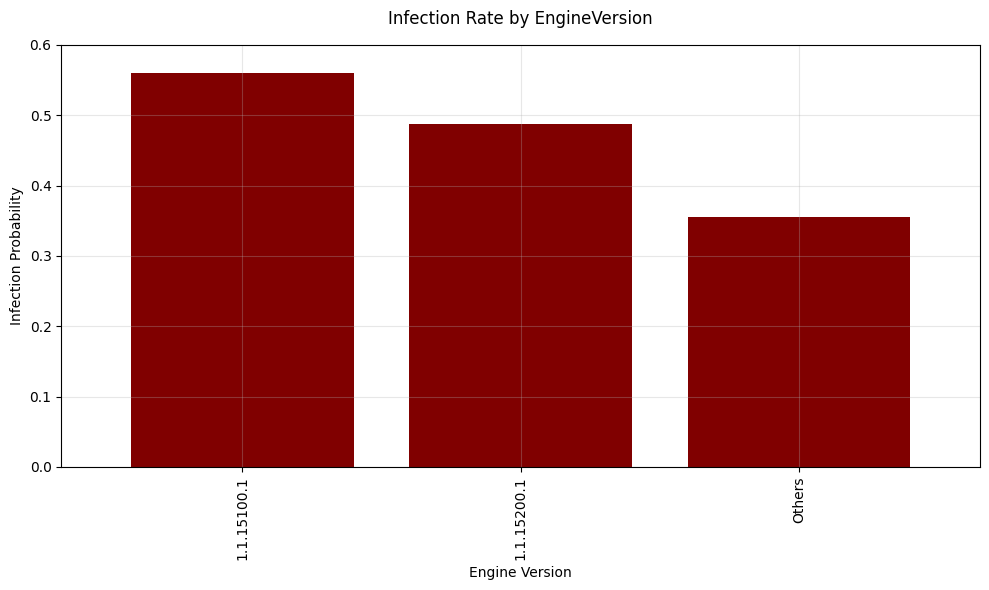

In [23]:
df['EngineVersion'] = df['EngineVersion'].apply(
    lambda x: x if x in ['1.1.15200.1', '1.1.15100.1'] else 'Others'
)

plt.figure(figsize=(10, 6))

infection_rates = df.groupby('EngineVersion')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by EngineVersion', pad=15)
plt.xlabel('Engine Version')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.ylim(0, 0.6)
plt.tight_layout()
plt.show()

### EngineVersion seems to be an important feature.

### It's time to do some feature engineering
#### Risk Level Categories
- **Feature Name:** `engine_risk_level`
- **Type:** Ordinal (0-2)
- **Categories:**
  - **Level 2 (High Risk):**
    - Highest infection probability (~55%-60%).
  - **Level 1 (Medium Risk):**
    - Moderate infection probability (~45%-50%).
  - **Level 0 (Low Risk):**
    - Lowest infection probability (~30%-40%).


In [24]:
def categorize_engine_version(version):
    if version == '1.1.15100.1':
        return 2
    elif version == '1.1.15200.1':
        return 1
    else:
        return 0

X_train['EngineVersion_Risk'] = X_train['EngineVersion'].apply(categorize_engine_version)
X_test['EngineVersion_Risk'] = X_test['EngineVersion'].apply(categorize_engine_version)

X_train = X_train.drop('EngineVersion', axis=1)
X_test = X_test.drop('EngineVersion', axis=1)

print(X_train['EngineVersion_Risk'].value_counts())
print(X_test['EngineVersion_Risk'].value_counts())


EngineVersion_Risk
1    45219
2    44017
0    10764
Name: count, dtype: int64
EngineVersion_Risk
1    4501
2    4478
0    1021
Name: count, dtype: int64


## 3. AppVersion

In [25]:
len(X_train["AppVersion"].unique())

69

In [26]:
len(X_test["AppVersion"].unique())

59

In [27]:
X_train["AppVersion"].value_counts()

AppVersion
4.18.1807.18075     62119
4.18.1806.18062     10473
4.12.16299.15        3234
4.16.17656.18052     2943
4.14.17639.18041     2490
4.8.10240.17443      2421
4.9.10586.1106       2275
4.13.17134.1         2141
4.13.17134.228       2121
4.10.209.0           1590
4.12.17007.18022     1269
4.9.10586.0           721
4.11.15063.447        642
4.14.17613.18039      631
4.12.17007.18011      557
4.11.15063.0          517
4.10.14393.0          494
4.8.10240.16384       454
4.10.14393.1794       356
4.11.15063.1155       328
4.9.10586.672         232
4.13.17134.191        222
4.10.14393.1198       183
4.9.10586.494         156
4.12.17007.17123      121
4.13.17134.112        116
4.10.14393.1613       113
4.9.10586.1045        112
4.9.10586.589         112
4.18.1809.2            83
4.10.14393.1593        75
4.8.10240.17946        71
4.9.10586.916          60
4.10.14393.953         59
4.10.14393.1066        56
4.9.10586.962          55
4.9.10586.873          53
4.9.10586.965          50
4

In [28]:
X_test["AppVersion"].value_counts()

AppVersion
4.18.1807.18075     6169
4.18.1806.18062     1111
4.16.17656.18052     328
4.12.16299.15        316
4.8.10240.17443      242
4.9.10586.1106       239
4.14.17639.18041     237
4.13.17134.1         224
4.13.17134.228       189
4.10.209.0           163
4.12.17007.18022     134
4.14.17613.18039      65
4.9.10586.0           65
4.12.17007.18011      58
4.11.15063.447        58
4.10.14393.0          51
4.10.14393.1794       44
4.11.15063.0          43
4.8.10240.16384       41
4.11.15063.1155       29
4.10.14393.1198       18
4.13.17134.191        17
4.9.10586.494         15
4.9.10586.1045        13
4.12.17007.17123      13
4.9.10586.672         12
4.13.17134.112        10
4.10.14393.1593        8
4.9.10586.589          8
4.10.14393.953         7
4.10.14393.1613        7
4.18.1809.2            6
4.8.10240.17946        6
4.9.10586.916          5
4.9.10586.839          5
4.10.14393.1066        5
4.8.10240.17889        5
4.9.10586.962          5
4.8.10240.17914        3
4.8.10240.1731

In [29]:
X_train['AppVersion'] = X_train['AppVersion'].apply(
    lambda x: x if x in ['4.18.1807.18075', '4.18.1806.18062', '4.12.16299.15'] else 'Others'
)

X_test['AppVersion'] = X_train['AppVersion'].apply(
    lambda x: x if x in ['4.18.1807.18075', '4.18.1806.18062', '4.12.16299.15'] else 'Others'
)

In [30]:
X_train['AppVersion'].value_counts()

AppVersion
4.18.1807.18075    62119
Others             24174
4.18.1806.18062    10473
4.12.16299.15       3234
Name: count, dtype: int64

In [31]:
X_test['AppVersion'].value_counts()

AppVersion
4.18.1807.18075    6218
Others             2412
4.18.1806.18062    1033
4.12.16299.15       337
Name: count, dtype: int64

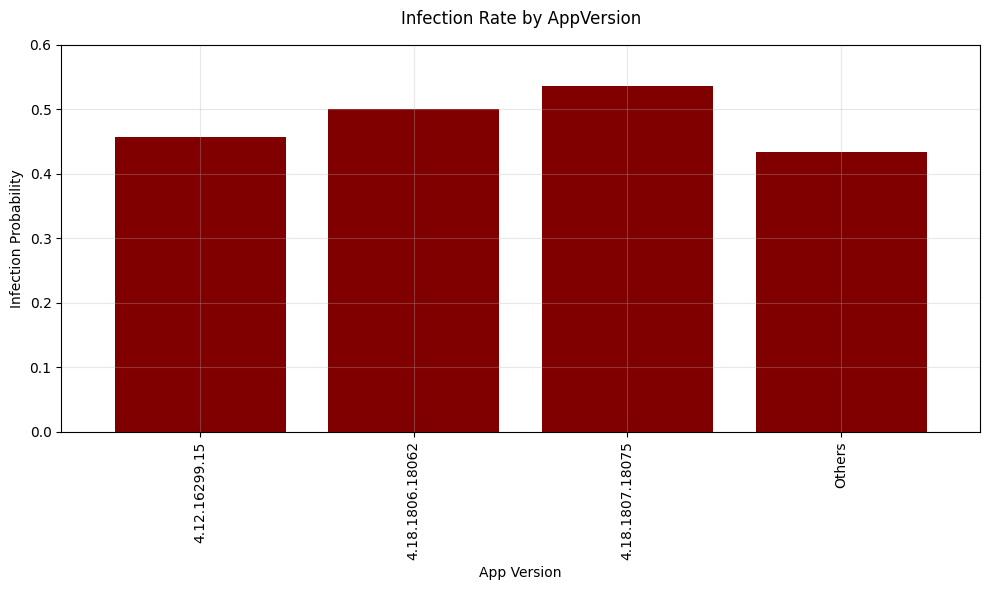

In [32]:
df['AppVersion'] = df['AppVersion'].apply(
    lambda x: x if x in ['4.18.1807.18075', '4.18.1806.18062', '4.12.16299.15'] else 'Others'
)
plt.figure(figsize=(10, 6))

infection_rates = df.groupby('AppVersion')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by AppVersion', pad=15)
plt.xlabel('App Version')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(0, 0.6)
plt.show()

### Droping this feature as probabilities are similar

In [33]:
X_train = X_train.drop('AppVersion', axis=1)
X_test = X_test.drop('AppVersion', axis=1)

## 5. SignatureVersion

In [34]:
# X_train["SignatureVersion"].value_counts()

In [35]:
len(X_train["SignatureVersion"].unique())

2735

In [36]:
len(X_test["SignatureVersion"].unique())

1438

### Good idea to drop SignatureVersion to prevent Overfitting

In [37]:
X_train = X_train.drop('SignatureVersion', axis=1)
X_test = X_test.drop('SignatureVersion', axis=1)

## 6. IsBetaUser

In [38]:
X_train["IsBetaUser"].value_counts()

IsBetaUser
0    100000
Name: count, dtype: int64

### Since All are same, So droping this feature also.

In [39]:
X_train = X_train.drop('IsBetaUser', axis=1)
X_test = X_test.drop('IsBetaUser', axis=1)

In [40]:
len(X_train["AntivirusConfigID"].unique())

1977

## 7. RealTimeProtectionState

In [41]:
X_train["RealTimeProtectionState"].value_counts()

RealTimeProtectionState
7.0    97375
0.0     2113
5.0      210
8.0      206
3.0       19
1.0       11
Name: count, dtype: int64

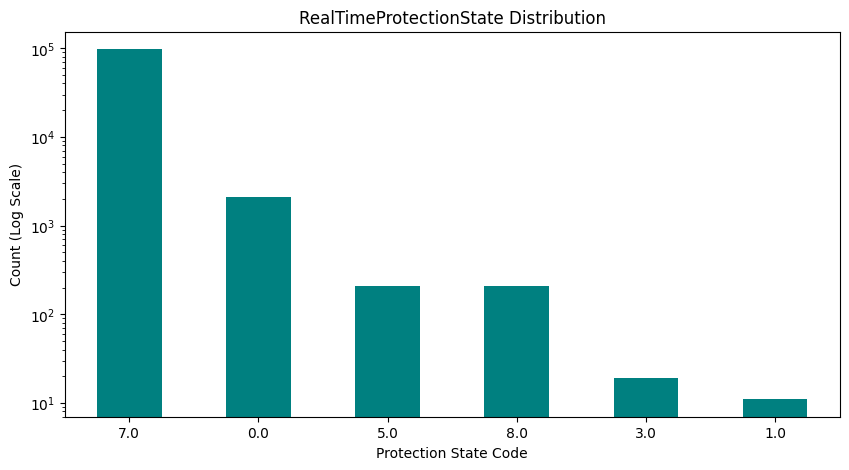

In [42]:
ax = X_train["RealTimeProtectionState"].value_counts().plot(
    kind='bar',
    title='RealTimeProtectionState Distribution',
    figsize=(10, 5),
    color='teal',
    rot=0
)
ax.set_xlabel("Protection State Code")
ax.set_ylabel("Count (Log Scale)")
ax.set_yscale('log')
plt.show()


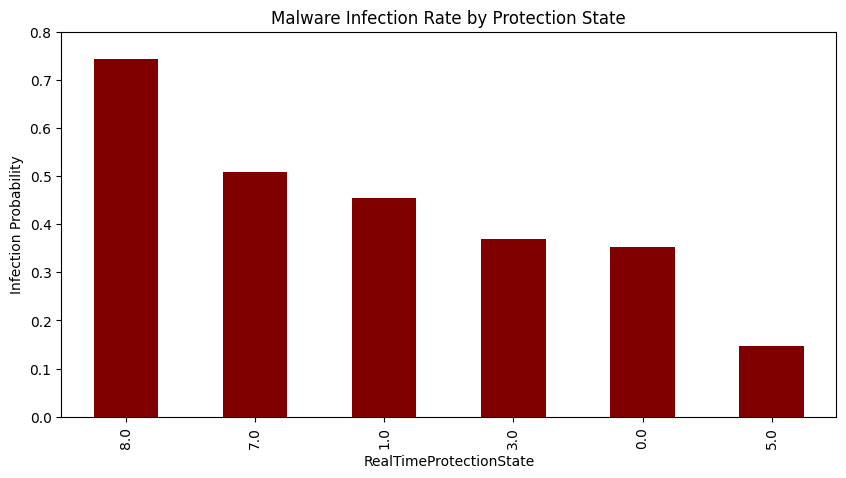

In [43]:
# Calculate infection rates per state
state_risk = df.groupby('RealTimeProtectionState')['target'].mean().sort_values(ascending=False)

# Plot risk profile
plt.figure(figsize=(10,5))
state_risk.plot(kind='bar', color='maroon')
plt.title('Malware Infection Rate by Protection State')
plt.ylabel('Infection Probability')
plt.ylim(0, 0.8)
plt.show()


### RealTimeProtectionState seems to be an important feature.

## Feature Engineering for RealTimeProtectionState

### 1. Binary Flag Feature
- **Feature Name**: `is_high_risk`
- **Type**: Binary (0 or 1)
- **Logic**:
  - 1 if state = 8.0 (highest infection rate ~73%)
  - 0 for all other states

### 2. Protection Level Categories
- **Feature Name**: `protection_level`
- **Type**: Ordinal (0-3)
- **Categories**:
  - **Level 3** (High Risk)
    - State: 8.0
    - Highest infection probability
  
  - **Level 2** (Medium Risk)
    - States: 7.0, 1.0
    - Moderate infection rates
  
  - **Level 1** (Low Risk)
    - States: 0.0, 3.0
    - Lower infection rates
  
  - **Level 0** (Very Low Risk)
    - State: 5.0
    - Lowest infection probability (~15%)

In [44]:
# 1. Create binary flags for high-risk states
X_train['is_high_risk'] = (X_train['RealTimeProtectionState'] == 8.0).astype(int)
X_test['is_high_risk'] = (X_test['RealTimeProtectionState'] == 8.0).astype(int)

def get_protection_level(state):
    if state == 8.0:
        return 3
    elif state in [7.0, 1.0]:
        return 2
    elif state in [0.0, 3.0]:
        return 1
    else:
        return 0

X_train['protection_level'] = X_train['RealTimeProtectionState'].apply(get_protection_level)
X_test['protection_level'] = X_test['RealTimeProtectionState'].apply(get_protection_level)

In [45]:
# 3 Drop RealTimeProtectionState from both training and test sets
X_train = X_train.drop('RealTimeProtectionState', axis=1)
X_test = X_test.drop('RealTimeProtectionState', axis=1)

## 8. IsPassiveModeEnabled

In [46]:
X_train["IsPassiveModeEnabled"].value_counts()

IsPassiveModeEnabled
0    98238
1     1762
Name: count, dtype: int64

In [47]:
X_test["IsPassiveModeEnabled"].value_counts()

IsPassiveModeEnabled
0    9826
1     174
Name: count, dtype: int64

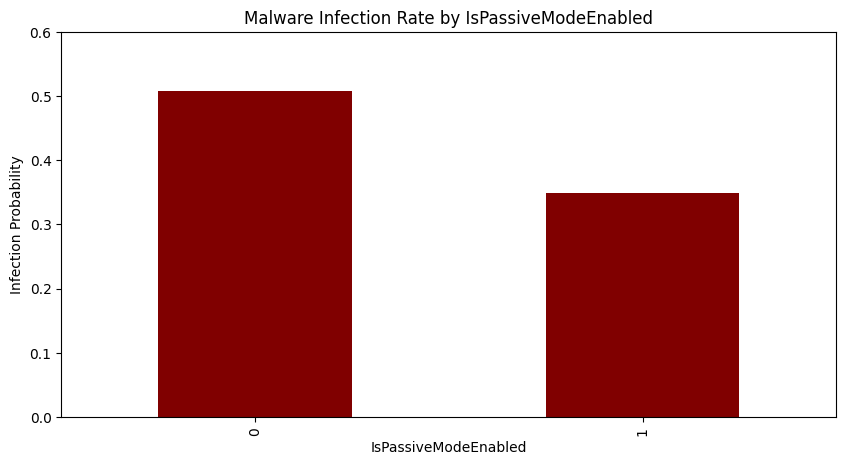

In [48]:
# Calculate infection rates per state
state_risk = df.groupby('IsPassiveModeEnabled')['target'].mean().sort_values(ascending=False)

# Plot risk profile
plt.figure(figsize=(10,5))
state_risk.plot(kind='bar', color='maroon')
plt.title('Malware Infection Rate by IsPassiveModeEnabled')
plt.ylabel('Infection Probability')
plt.ylim(0, 0.6)
plt.show()


### Seems important, also this is alredy in binary form so keep it as it is.

## 9. AntivirusConfigID

In [49]:
# X_train["AntivirusConfigID"].value_counts()

In [50]:
len(X_train["AntivirusConfigID"].unique())

1977

In [51]:
len(X_test["AntivirusConfigID"].unique())

471

### Good idea to drop AntivirusConfigID to prevent Overfitting

In [52]:
X_train = X_train.drop('AntivirusConfigID', axis=1)
X_test = X_test.drop('AntivirusConfigID', axis=1)

## 10. NumAntivirusProductsInstalled

In [53]:
X_train["NumAntivirusProductsInstalled"].value_counts()

NumAntivirusProductsInstalled
1.0    69748
2.0    27825
3.0     2255
4.0       91
5.0        5
Name: count, dtype: int64

In [54]:
X_test["NumAntivirusProductsInstalled"].value_counts()

NumAntivirusProductsInstalled
1.0    6986
2.0    2767
3.0     234
4.0       9
5.0       2
Name: count, dtype: int64

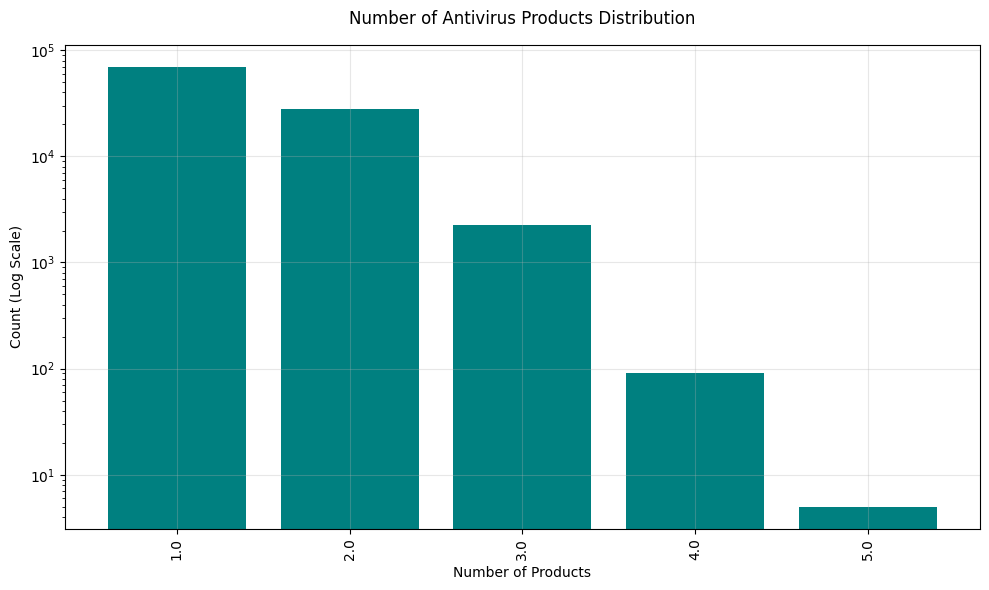

In [55]:
plt.figure(figsize=(10, 6))
X_train["NumAntivirusProductsInstalled"].value_counts().sort_index().plot(
    kind='bar',
    color='teal',
    width=0.8
)
plt.yscale('log')
plt.title('Number of Antivirus Products Distribution', pad=15)
plt.xlabel('Number of Products')
plt.ylabel('Count (Log Scale)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

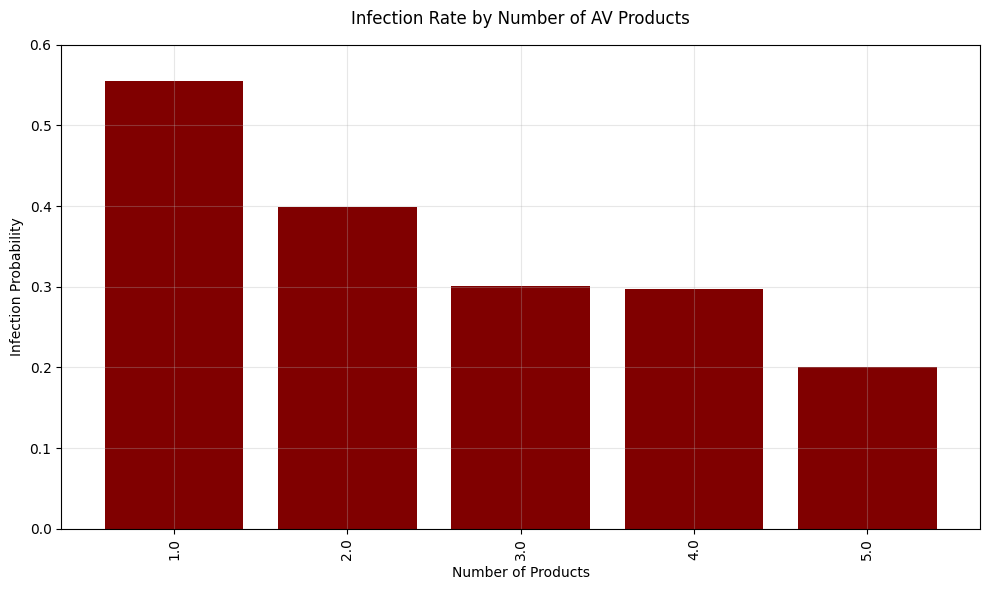

In [56]:
plt.figure(figsize=(10, 6))
infection_rates = df.groupby('NumAntivirusProductsInstalled')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by Number of AV Products', pad=15)
plt.xlabel('Number of Products')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(0, 0.6)
plt.show()

### Seems important, so keep it.

In [57]:
X_train['single_av'] = (X_train['NumAntivirusProductsInstalled'] == 1).astype(int)
X_test['single_av'] = (X_test['NumAntivirusProductsInstalled'] == 1).astype(int)

# 2. Create risk categories
def get_av_risk_category(num_av):
    if num_av == 1:
        return 0
    elif num_av == 2:
        return 1
    elif num_av == 3 or num_av == 4:
        return 2
    else:
        return 3

X_train['av_risk_category'] = X_train['NumAntivirusProductsInstalled'].apply(get_av_risk_category)
X_test['av_risk_category'] = X_test['NumAntivirusProductsInstalled'].apply(get_av_risk_category)

In [58]:
X_train = X_train.drop('NumAntivirusProductsInstalled', axis=1)
X_test = X_test.drop('NumAntivirusProductsInstalled', axis=1)

## 11. HasTpm

In [59]:
X_train["HasTpm"].value_counts()

HasTpm
1    99678
0      322
Name: count, dtype: int64

In [60]:
X_test["HasTpm"].value_counts()

HasTpm
1    9962
0      38
Name: count, dtype: int64

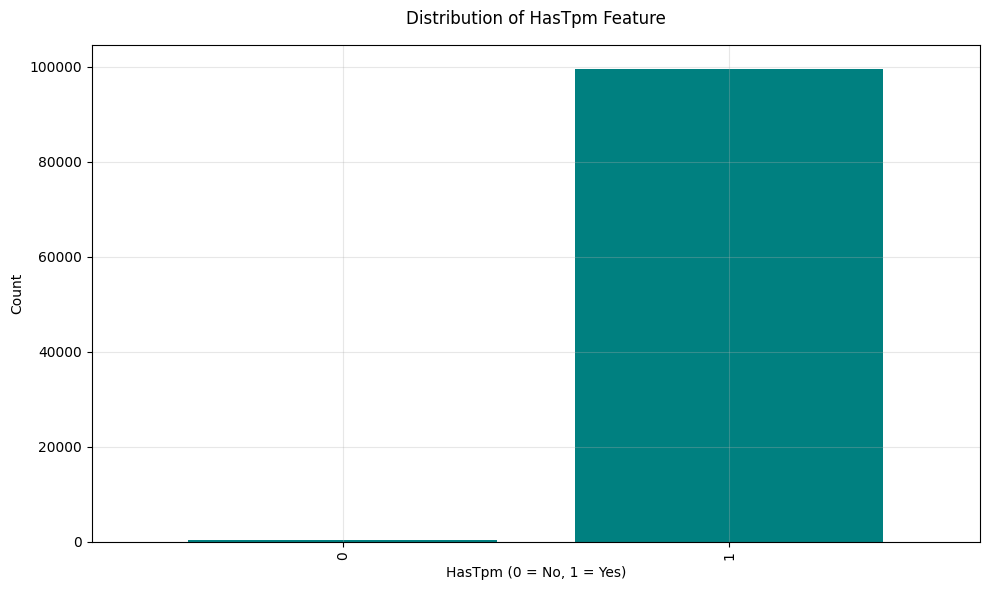

In [61]:
# First Graph - Distribution Plot
plt.figure(figsize=(10, 6))
X_train['HasTpm'].value_counts().sort_index().plot(
    kind='bar',
    color='teal',
    width=0.8
)
plt.title('Distribution of HasTpm Feature', pad=15)
plt.xlabel('HasTpm (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


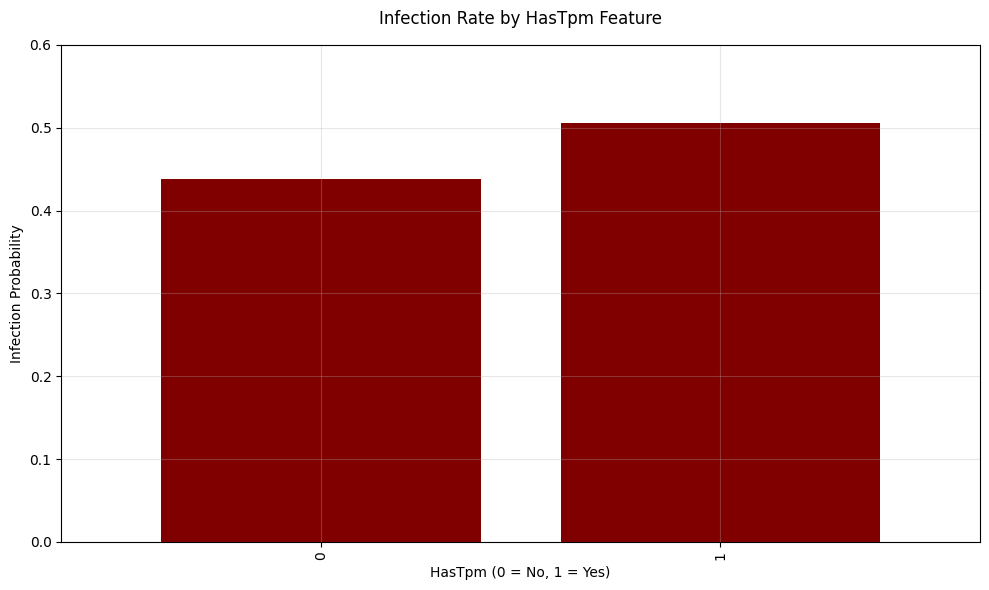

In [62]:
# Second Graph - Infection Rate Plot
plt.figure(figsize=(10, 6))
infection_rates = df.groupby('HasTpm')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by HasTpm Feature', pad=15)
plt.xlabel('HasTpm (0 = No, 1 = Yes)')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(0, 0.6)
plt.show()


### Droping this feature as it does not make any sense to keep it

In [63]:
X_train = X_train.drop('HasTpm', axis=1)
X_test = X_test.drop('HasTpm', axis=1)

## Some features are Geographic information that may introduce bias (Droping Them).
## 12. CountryID
## 13. CityID
## 14. GeoRegionID
## 15. LocaleEnglishNameID:

In [64]:
X_train = X_train.drop('CountryID', axis=1)
X_test = X_test.drop('CountryID', axis=1)

In [65]:
X_train = X_train.drop('CityID', axis=1)
X_test = X_test.drop('CityID', axis=1)

In [66]:
X_train = X_train.drop('GeoRegionID', axis=1)
X_test = X_test.drop('GeoRegionID', axis=1)

In [67]:
X_train = X_train.drop('LocaleEnglishNameID', axis=1)
X_test = X_test.drop('LocaleEnglishNameID', axis=1)

## 16. **PlatformType**

In [68]:
X_train["PlatformType"].value_counts()

PlatformType
windows10      98344
windows8        1401
windows7         226
windows2016       29
Name: count, dtype: int64

In [69]:
X_test["PlatformType"].value_counts()

PlatformType
windows10      9831
windows8        141
windows7         27
windows2016       1
Name: count, dtype: int64

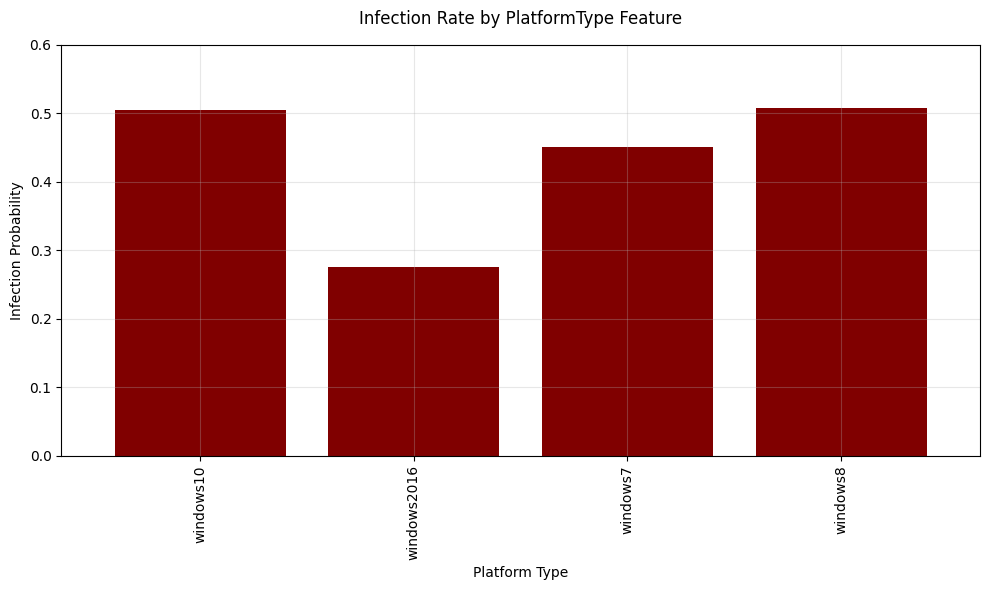

In [70]:
plt.figure(figsize=(10, 6))
infection_rates = df.groupby('PlatformType')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by PlatformType Feature', pad=15)
plt.xlabel('Platform Type')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(0, 0.6)
plt.show()


### Since Windows 10, Windows 7 and Windows 8 shows similar probability and for Windows 2016 only one datapoint is present in test database, So Droping it

In [71]:
X_train = X_train.drop('PlatformType', axis=1)
X_test = X_test.drop('PlatformType', axis=1)

## 17. Processor

In [72]:
X_train["Processor"].value_counts()

Processor
x64      91262
x86       8733
arm64        5
Name: count, dtype: int64

In [73]:
X_test["Processor"].value_counts()

Processor
x64      9144
x86       855
arm64       1
Name: count, dtype: int64

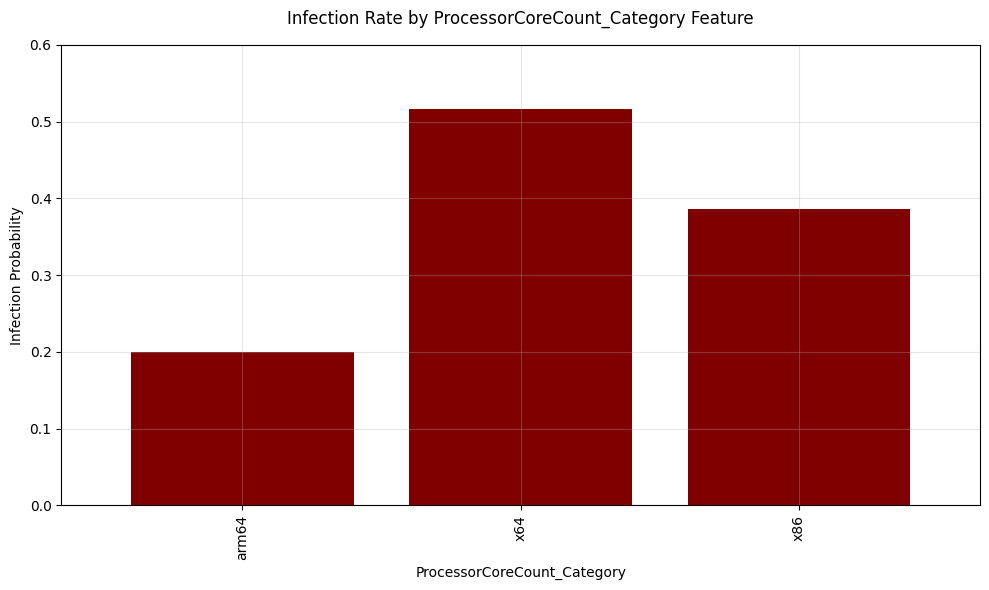

In [74]:
plt.figure(figsize=(10, 6))
infection_rates = df.groupby('Processor')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by ProcessorCoreCount_Category Feature', pad=15)
plt.xlabel('ProcessorCoreCount_Category')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(0, 0.6)
plt.show()

### Encoding these based of risk categories.

In [75]:
processor_mapping = {'x64': 2, 'x86': 1, 'arm64': 0}

X_test['Processor_Encoded'] = X_test['Processor'].map(processor_mapping)
X_train['Processor_Encoded'] = X_train['Processor'].map(processor_mapping)

print(X_test['Processor_Encoded'].value_counts())

Processor_Encoded
2    9144
1     855
0       1
Name: count, dtype: int64


In [76]:
X_train = X_train.drop('Processor', axis=1)
X_test = X_test.drop('Processor', axis=1)

## 18. **ProcessorCoreCount**

In [77]:
X_train["ProcessorCoreCount"].value_counts()

ProcessorCoreCount
4.0     62036
2.0     25310
8.0      9824
12.0     1040
6.0       790
1.0       530
16.0      202
3.0       106
32.0       21
20.0       19
24.0       15
28.0        7
40.0        4
36.0        4
10.0        2
48.0        2
64.0        1
5.0         1
56.0        1
Name: count, dtype: int64

In [78]:
X_test["ProcessorCoreCount"].value_counts()

ProcessorCoreCount
4.0     6189
2.0     2535
8.0      967
12.0     117
6.0       74
1.0       66
16.0      25
3.0       12
32.0       3
20.0       1
Name: count, dtype: int64

In [79]:
# Function to categorize ProcessorCoreCount
def categorize_processor_core_count(count):
    if count == 4.0:
        return 'High Count'  # High core count
    elif count == 2.0:
        return 'Medium Count'  # Medium core count
    else:
        return 'Other'  # All other counts

# Apply the function to categorize ProcessorCoreCount in both train and test sets
X_train['ProcessorCoreCount_Category'] = X_train['ProcessorCoreCount'].apply(categorize_processor_core_count)
X_test['ProcessorCoreCount_Category'] = X_test['ProcessorCoreCount'].apply(categorize_processor_core_count)

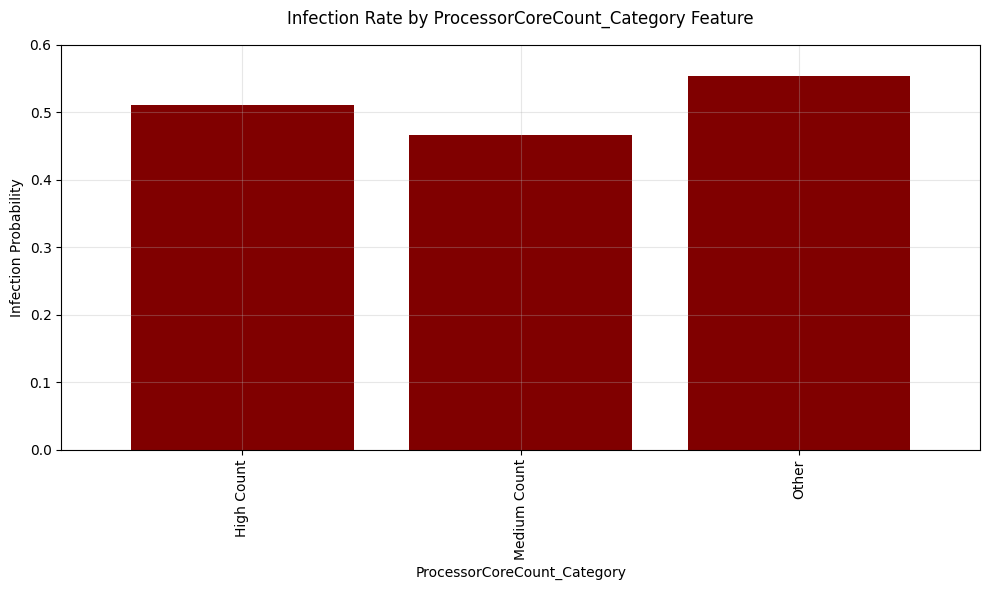

In [80]:
df['ProcessorCoreCount_Category'] = df['ProcessorCoreCount'].apply(categorize_processor_core_count)

plt.figure(figsize=(10, 6))
infection_rates = df.groupby('ProcessorCoreCount_Category')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by ProcessorCoreCount_Category Feature', pad=15)
plt.xlabel('ProcessorCoreCount_Category')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(0, 0.6)
plt.show()



In [81]:
X_train = X_train.drop('ProcessorCoreCount_Category', axis=1)
X_test = X_test.drop('ProcessorCoreCount_Category', axis=1)

In [82]:
X_train.head()

,IsPassiveModeEnabled,NumAntivirusProductsEnabled,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,EngineVersion_Risk,is_high_risk,protection_level,single_av,av_risk_category,Processor_Encoded
0,0,1.0,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,1,0,2,1,0,1
1,0,1.0,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,2,0,2,1,0,2
2,0,1.0,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1,0,2,1,0,2
3,0,1.0,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1,0,2,0,1,2
4,0,1.0,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0,13224.0,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,1,0,2,0,1,1


In [83]:
X_train["OSVersion"].value_counts()

OSVersion
10.0.0.0    98368
6.3.0.0      1401
6.1.1.0       226
10.0.1.0        2
10.0.2.0        1
10.0.3.0        1
10.0.4.0        1
Name: count, dtype: int64

In [84]:
X_test["OSVersion"].value_counts()

OSVersion
10.0.0.0    9832
6.3.0.0      141
6.1.1.0       27
Name: count, dtype: int64

### Split OSVersion into numerical components


In [85]:
version_components = X_train['OSVersion'].str.split('.', expand=True).astype(float)
X_train = X_train.assign(
    OSMajor=version_components[0],
)

### Distribution Plot for OSMajor


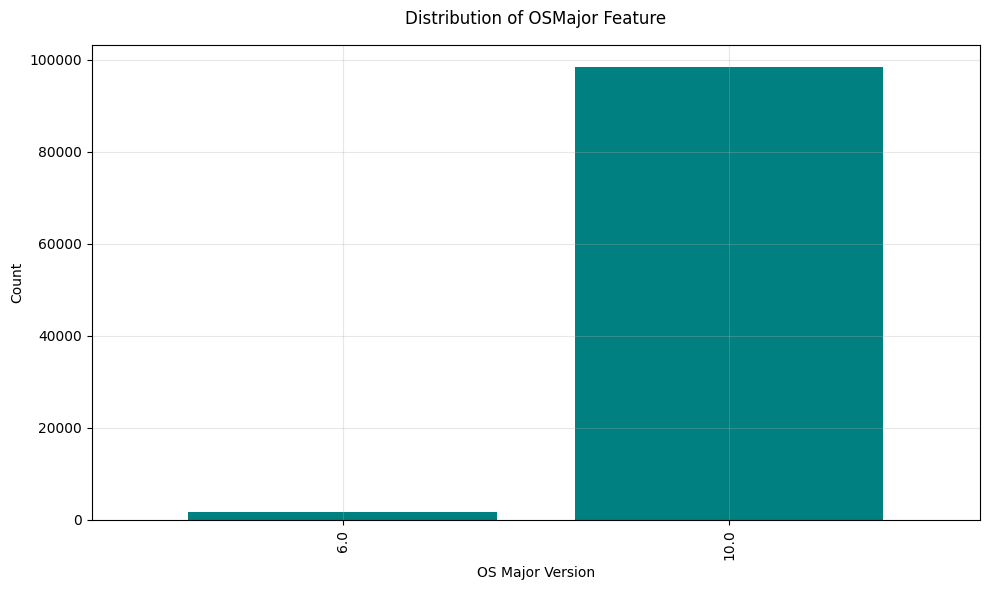

In [86]:
plt.figure(figsize=(10, 6))
X_train['OSMajor'].value_counts().sort_index().plot(
    kind='bar',
    color='teal',
    width=0.8
)
plt.title('Distribution of OSMajor Feature', pad=15)
plt.xlabel('OS Major Version')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


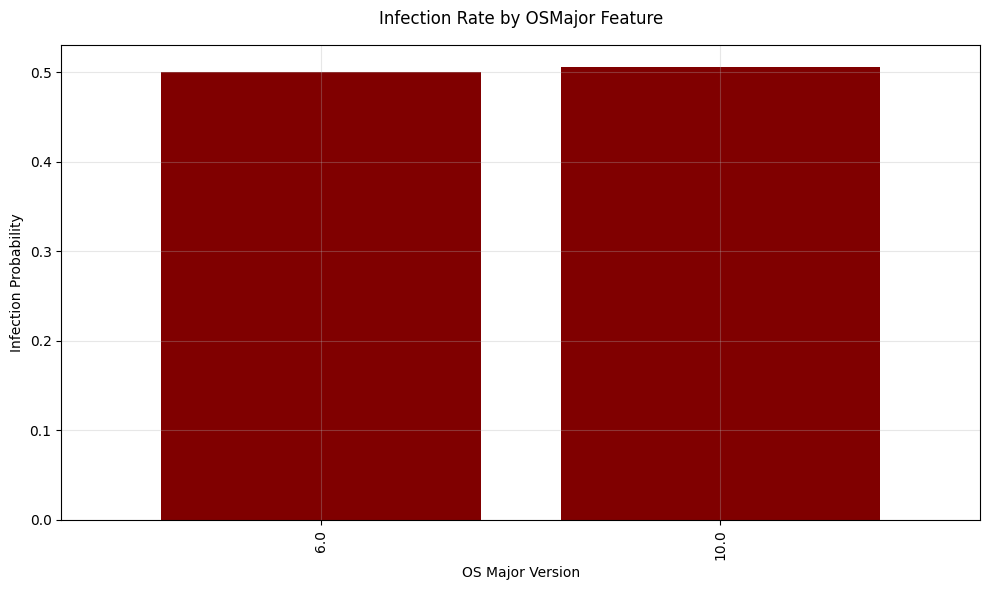

In [87]:
version_components_df = df['OSVersion'].str.split('.', expand=True).astype(float)
df['OSMajor'] = version_components_df[0]

# Now create the infection rate plot
plt.figure(figsize=(10, 6))
infection_rates_osmajor = df.groupby('OSMajor')['target'].mean()
infection_rates_osmajor.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by OSMajor Feature', pad=15)
plt.xlabel('OS Major Version')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Droping this feature

In [88]:
X_train = X_train.drop('OSMajor', axis=1)

In [89]:
X_train = X_train.drop('OSVersion', axis=1)
X_test = X_test.drop('OSVersion', axis=1)

## **OSProductSuite, OsPlatformSubRelease, OSBuildLab, SKUEditionName**: Too specific, may lead to overfitting.

In [90]:
X_train = X_train.drop('OSProductSuite', axis=1)
X_test = X_test.drop('OSProductSuite', axis=1)

X_train = X_train.drop('OsPlatformSubRelease', axis=1)
X_test = X_test.drop('OsPlatformSubRelease', axis=1)

X_train = X_train.drop('OSBuildLab', axis=1)
X_test = X_test.drop('OSBuildLab', axis=1)

X_train = X_train.drop('SKUEditionName', axis=1)
X_test = X_test.drop('SKUEditionName', axis=1)

## IsSystemProtected

In [91]:
X_train["IsSystemProtected"].value_counts()

IsSystemProtected
1.0    95460
0.0     4464
Name: count, dtype: int64

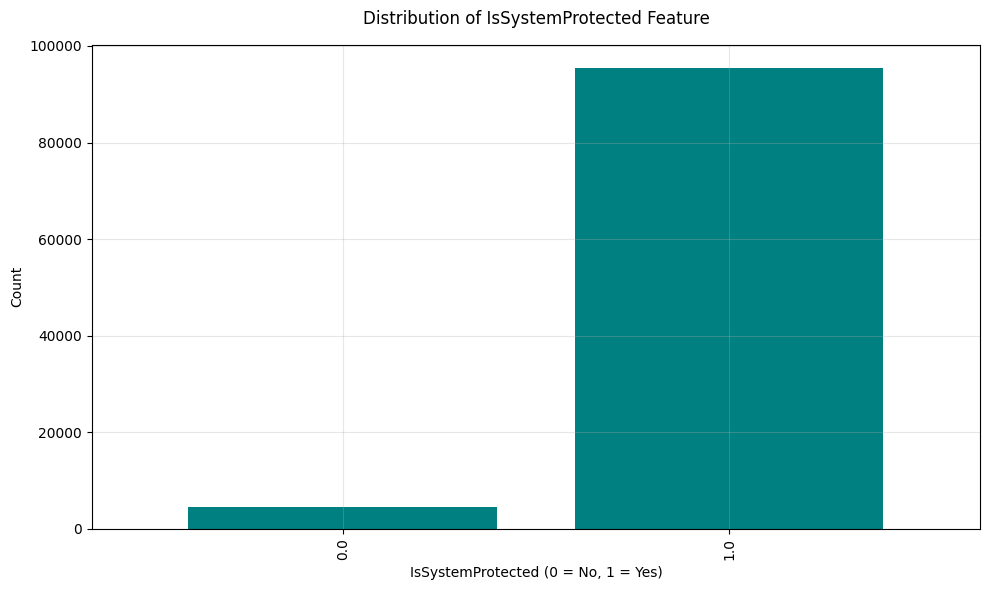

In [92]:
# First Graph - Distribution Plot
plt.figure(figsize=(10, 6))
X_train['IsSystemProtected'].value_counts().sort_index().plot(
    kind='bar',
    color='teal',
    width=0.8
)
plt.title('Distribution of IsSystemProtected Feature', pad=15)
plt.xlabel('IsSystemProtected (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


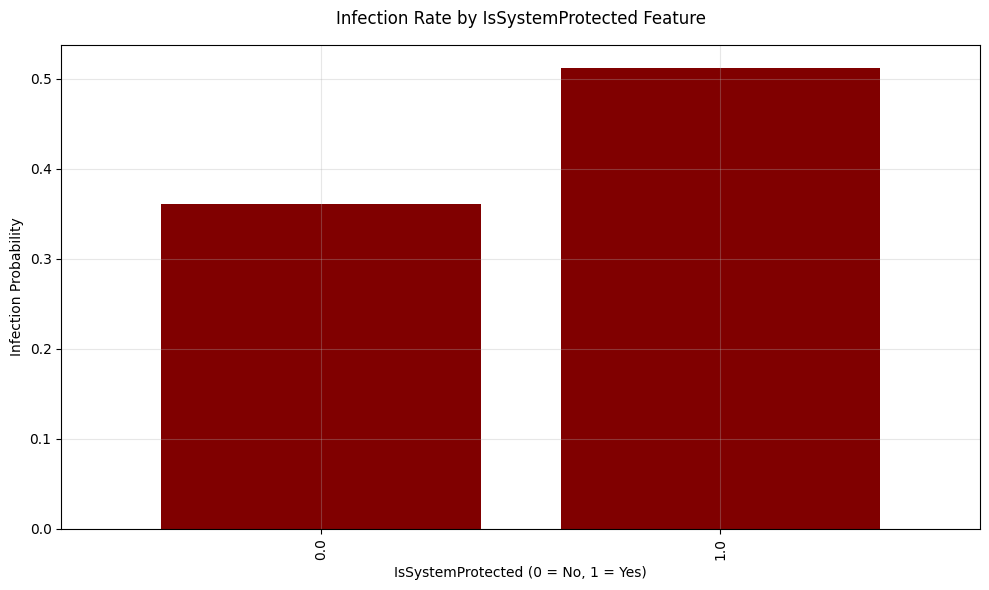

In [93]:
# Second Graph - Infection Rate Analysis
plt.figure(figsize=(10, 6))
# First add column to df if not present
df['IsSystemProtected'] = X_train['IsSystemProtected']

infection_rates = df.groupby('IsSystemProtected')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by IsSystemProtected Feature', pad=15)
plt.xlabel('IsSystemProtected (0 = No, 1 = Yes)')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Let's keep it.

In [94]:
X_train["AutoSampleSubmissionEnabled"].value_counts()

AutoSampleSubmissionEnabled
0    100000
Name: count, dtype: int64

### Since All are same

In [95]:
X_train = X_train.drop('AutoSampleSubmissionEnabled', axis=1)
X_test = X_test.drop('AutoSampleSubmissionEnabled', axis=1)

## SMode

In [96]:
X_train["SMode"].value_counts()

SMode
0.0    98969
1.0       50
Name: count, dtype: int64

In [97]:
X_test["SMode"].value_counts()

SMode
0.0    9899
1.0       9
Name: count, dtype: int64

### May lead to overfitting and increasing complexity of model for such a small variation

In [98]:
X_train = X_train.drop('SMode', axis=1)
X_test = X_test.drop('SMode', axis=1)

## IEVersionID

In [99]:
# X_train["IEVersionID"].value_counts()

In [100]:
# X_test["IEVersionID"].value_counts()

### Function to categorize IEVersionID


In [101]:
def categorize_ie_version(version):
    if version in [137.0, 117.0, 111.0, 108.0, 98.0, 53.0, 74.0, 135.0]:
        return version  # Keep specified versions
    else:
        return 'Others'  # Group all others as 'Others'

# Apply the function to categorize IEVersionID in X_test
X_train['IEVersionID_Category'] = X_train['IEVersionID'].apply(categorize_ie_version)
X_test['IEVersionID_Category'] = X_test['IEVersionID'].apply(categorize_ie_version)


In [102]:
X_train["IEVersionID_Category"].value_counts()

IEVersionID_Category
137.0     45781
117.0     21531
Others    10962
108.0      5465
111.0      5093
98.0       3912
135.0      2566
53.0       2420
74.0       2270
Name: count, dtype: int64

In [103]:
X_test["IEVersionID_Category"].value_counts()

IEVersionID_Category
137.0     4554
117.0     2150
Others    1099
111.0      528
108.0      522
98.0       430
53.0       242
74.0       240
135.0      235
Name: count, dtype: int64

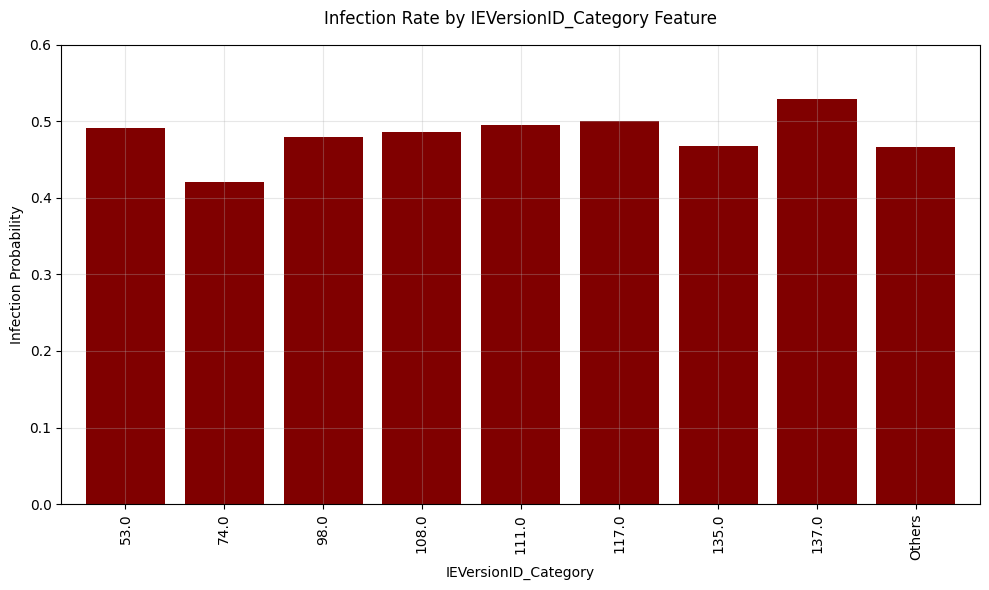

In [104]:
df['IEVersionID_Category'] = df['IEVersionID'].apply(categorize_ie_version)

plt.figure(figsize=(10, 6))
infection_rates = df.groupby('IEVersionID_Category')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by IEVersionID_Category Feature', pad=15)
plt.xlabel('IEVersionID_Category')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(0, 0.6)
plt.show()


### Since all are similar so drop it.

In [105]:
X_train = X_train.drop('IEVersionID_Category', axis=1)
X_test = X_test.drop('IEVersionID_Category', axis=1)

X_train = X_train.drop('IEVersionID', axis=1)
X_test = X_test.drop('IEVersionID', axis=1)

## FirewallEnabled

In [106]:
X_train["FirewallEnabled"].value_counts()

FirewallEnabled
1.0    97844
0.0     1990
Name: count, dtype: int64

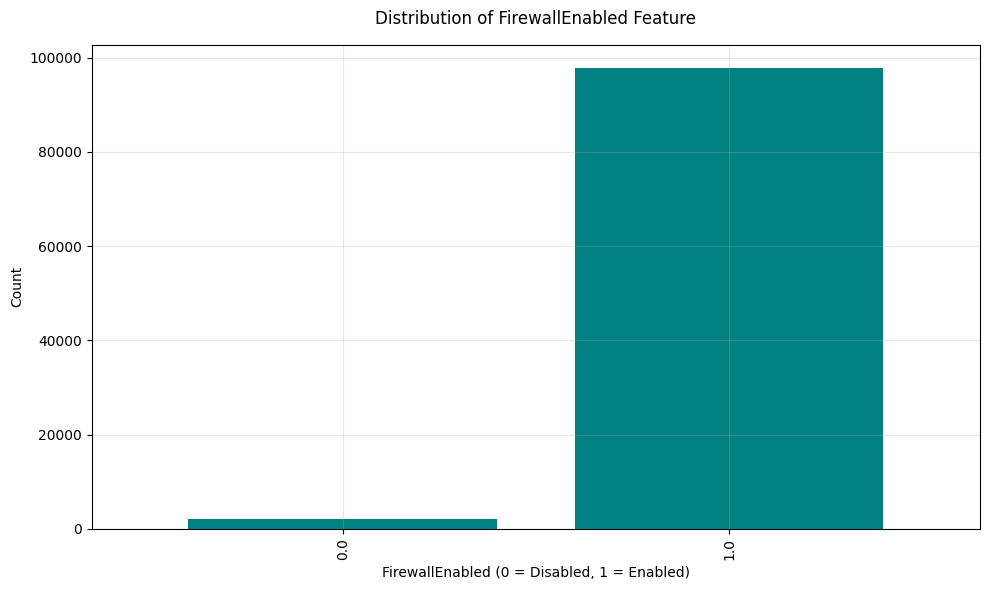

In [107]:
# First Graph - Distribution Plot
plt.figure(figsize=(10, 6))
X_train['FirewallEnabled'].value_counts().sort_index().plot(
    kind='bar',
    color='teal',
    width=0.8
)
plt.title('Distribution of FirewallEnabled Feature', pad=15)
plt.xlabel('FirewallEnabled (0 = Disabled, 1 = Enabled)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


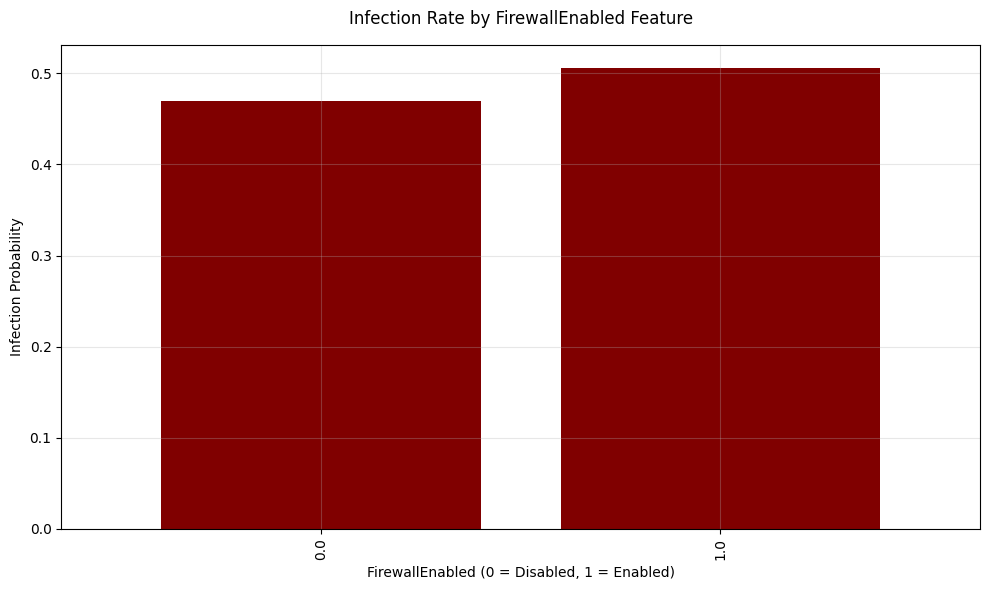

In [108]:
plt.figure(figsize=(10, 6))
df['FirewallEnabled'] = X_train['FirewallEnabled']

infection_rates = df.groupby('FirewallEnabled')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by FirewallEnabled Feature', pad=15)
plt.xlabel('FirewallEnabled (0 = Disabled, 1 = Enabled)')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [109]:
# 3 Drop FirewallEnabled from both training and test sets
X_train = X_train.drop('FirewallEnabled', axis=1)
X_test = X_test.drop('FirewallEnabled', axis=1)

## EnableLUA

In [110]:
X_train["EnableLUA"].value_counts()

EnableLUA
1.0     99494
0.0       484
48.0        3
Name: count, dtype: int64

In [111]:
X_test["EnableLUA"].value_counts()

EnableLUA
1.0    9950
0.0      50
Name: count, dtype: int64

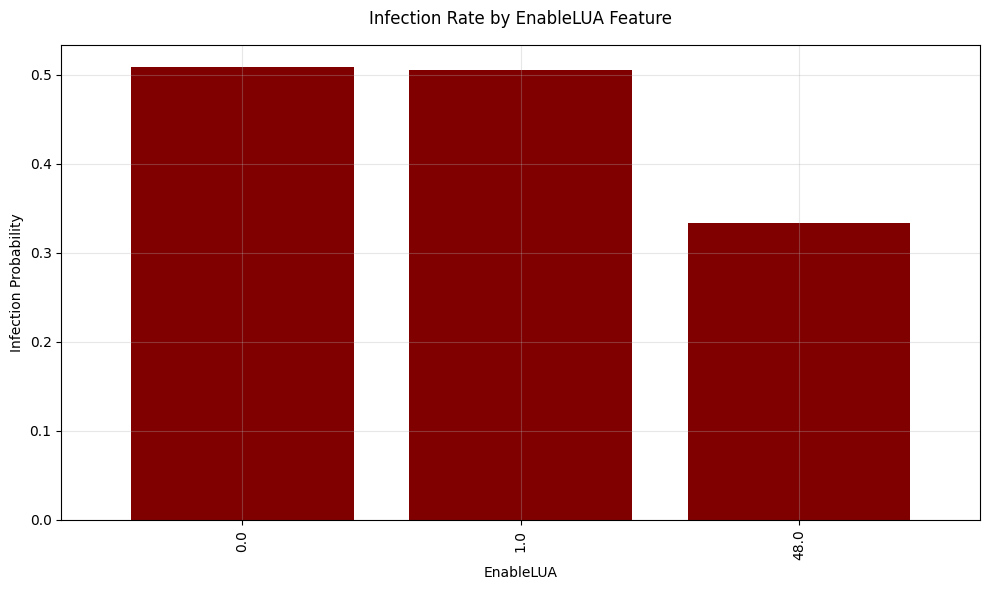

In [112]:
plt.figure(figsize=(10, 6))
infection_rates = df.groupby('EnableLUA')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by EnableLUA Feature', pad=15)
plt.xlabel('EnableLUA')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Since 48 is not present in the test data and 1.0 and 0.0 are same, So droping this feature.

In [113]:
X_train = X_train.drop('EnableLUA', axis=1)
X_test = X_test.drop('EnableLUA', axis=1)

## MDC2FormFactor

In [114]:
X_train["MDC2FormFactor"].value_counts()

MDC2FormFactor
Notebook        64547
Desktop         21612
Convertible      4807
Detachable       3510
AllInOne         3147
PCOther          1274
LargeTablet       706
SmallTablet       351
SmallServer        32
MediumServer       10
LargeServer         4
Name: count, dtype: int64

In [115]:
X_test["MDC2FormFactor"].value_counts()

MDC2FormFactor
Notebook       6482
Desktop        2116
Convertible     521
Detachable      340
AllInOne        330
PCOther         107
LargeTablet      68
SmallTablet      35
SmallServer       1
Name: count, dtype: int64

In [116]:
# Function to categorize MDC2FormFactor
def categorize_form_factor(form_factor):
    if form_factor in ['Notebook', 'Desktop', 'Convertible', 'Detachable', 'AllInOne']:
        return form_factor  # Keep these categories as they are
    else:
        return 'Other'  # Group all others as 'Other'

# Apply the function to categorize MDC2FormFactor in both X_train and X_test
X_train['MDC2FormFactor_Category'] = X_train['MDC2FormFactor'].apply(categorize_form_factor)
X_test['MDC2FormFactor_Category'] = X_test['MDC2FormFactor'].apply(categorize_form_factor)

X_train = X_train.drop('MDC2FormFactor', axis=1)
X_test = X_test.drop('MDC2FormFactor', axis=1)


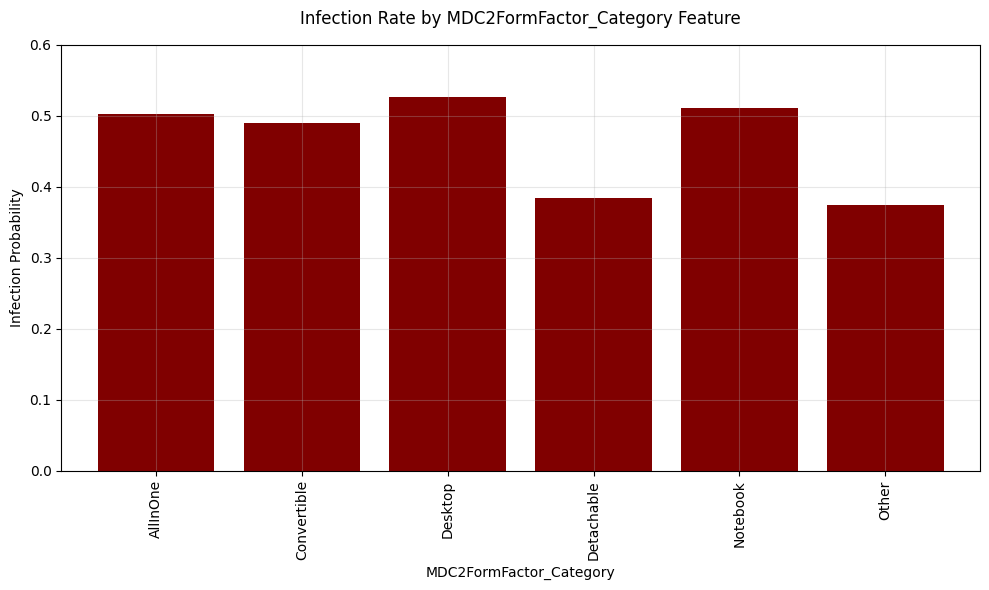

In [117]:
df['MDC2FormFactor_Category'] = df['MDC2FormFactor'].apply(categorize_form_factor)


plt.figure(figsize=(10, 6))
infection_rates = df.groupby('MDC2FormFactor_Category')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by MDC2FormFactor_Category Feature', pad=15)
plt.xlabel('MDC2FormFactor_Category')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(0, 0.6)
plt.show()


### Let's keep them for now and encode them

In [118]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder on the combined categories from both train and test sets
all_categories = pd.concat([X_train['MDC2FormFactor_Category'], X_test['MDC2FormFactor_Category']])
le.fit(all_categories)

# Transform the categories in both train and test sets
X_train['MDC2FormFactor_Encoded'] = le.transform(X_train['MDC2FormFactor_Category'])
X_test['MDC2FormFactor_Encoded'] = le.transform(X_test['MDC2FormFactor_Category'])

# Display the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category Mapping:")
for category, code in mapping.items():
    print(f"{category}: {code}")

# Display the value counts of the encoded categories
print("\nTrain set encoded categories:")
print(X_train['MDC2FormFactor_Encoded'].value_counts())
print("\nTest set encoded categories:")
print(X_test['MDC2FormFactor_Encoded'].value_counts())

Category Mapping:
AllInOne: 0
Convertible: 1
Desktop: 2
Detachable: 3
Notebook: 4
Other: 5

Train set encoded categories:
MDC2FormFactor_Encoded
4    64547
2    21612
1     4807
3     3510
0     3147
5     2377
Name: count, dtype: int64

Test set encoded categories:
MDC2FormFactor_Encoded
4    6482
2    2116
1     521
3     340
0     330
5     211
Name: count, dtype: int64


In [119]:
X_train = X_train.drop('MDC2FormFactor_Category', axis=1)
X_test = X_test.drop('MDC2FormFactor_Category', axis=1)

## DeviceFamily

In [120]:
X_train["DeviceFamily"].value_counts()

DeviceFamily
Windows.Desktop    99971
Windows.Server        29
Name: count, dtype: int64

In [121]:
X_test["DeviceFamily"].value_counts()

DeviceFamily
Windows.Desktop    9999
Windows.Server        1
Name: count, dtype: int64

### Droping beacuse of very low variability

In [122]:
X_train = X_train.drop('DeviceFamily', axis=1)
X_test = X_test.drop('DeviceFamily', axis=1)

## OEMNameID

### Manufacturer details, not directly related to security.

In [123]:
X_train = X_train.drop('OEMNameID', axis=1)
X_test = X_test.drop('OEMNameID', axis=1)

## OEMModelID

### Manufacturer details, not directly related to security.

In [124]:
X_train = X_train.drop('OEMModelID', axis=1)
X_test = X_test.drop('OEMModelID', axis=1)

## ProcessorManufacturerID

### Manufacturer details, not directly related to security.

In [125]:
X_train = X_train.drop('ProcessorManufacturerID', axis=1)
X_test = X_test.drop('ProcessorManufacturerID', axis=1)

## ProcessorModelID

In [126]:
X_train = X_train.drop('ProcessorModelID', axis=1)
X_test = X_test.drop('ProcessorModelID', axis=1)

## PrimaryDiskCapacityMB, PrimaryDiskType, SystemVolumeCapacityMB: Disk details, less impact on malware vulnerability.

In [127]:
X_train = X_train.drop('PrimaryDiskCapacityMB', axis=1)
X_test = X_test.drop('PrimaryDiskCapacityMB', axis=1)

X_train = X_train.drop('PrimaryDiskType', axis=1)
X_test = X_test.drop('PrimaryDiskType', axis=1)

X_train = X_train.drop('SystemVolumeCapacityMB', axis=1)
X_test = X_test.drop('SystemVolumeCapacityMB', axis=1)

## HasOpticalDiskDrive

In [128]:
X_train["HasOpticalDiskDrive"].value_counts()

HasOpticalDiskDrive
0    91860
1     8140
Name: count, dtype: int64

In [129]:
X_test["HasOpticalDiskDrive"].value_counts()

HasOpticalDiskDrive
0    9235
1     765
Name: count, dtype: int64

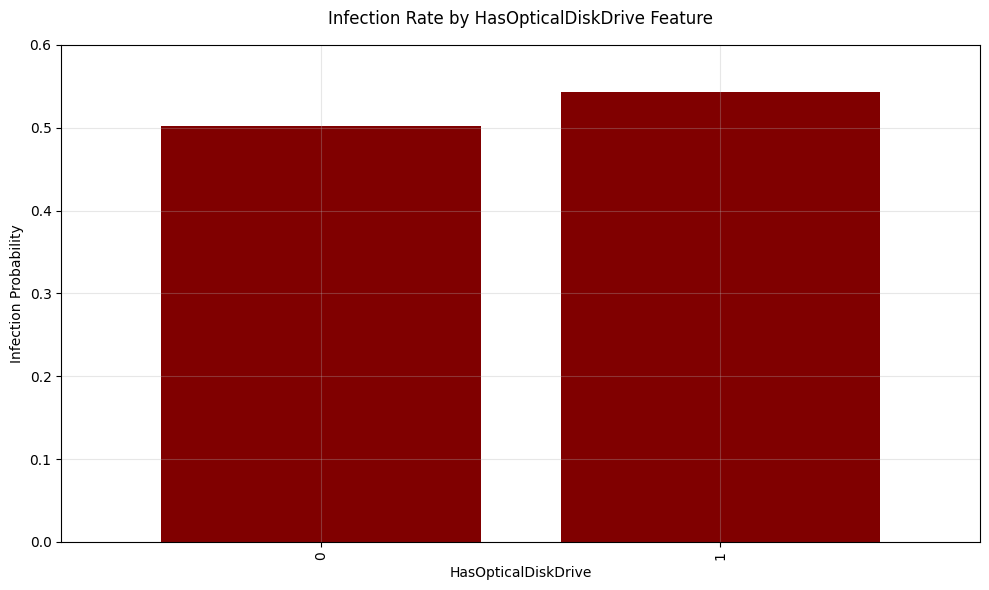

In [130]:
plt.figure(figsize=(10, 6))
infection_rates = df.groupby('HasOpticalDiskDrive')['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by HasOpticalDiskDrive Feature', pad=15)
plt.xlabel('HasOpticalDiskDrive')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(0, 0.6)
plt.show()


In [131]:
X_train = X_train.drop('HasOpticalDiskDrive', axis=1)
X_test = X_test.drop('HasOpticalDiskDrive', axis=1)

## ChassisType: Physical form factor, not directly related to security.

In [132]:
X_train = X_train.drop('ChassisType', axis=1)
X_test = X_test.drop('ChassisType', axis=1)

## PrimaryDiskCapacityMB, PrimaryDiskType, SystemVolumeCapacityMB: Disk details, less impact on malware vulnerability.

In [133]:
X_train = X_train.drop('PrimaryDisplayDiagonalInches', axis=1)
X_test = X_test.drop('PrimaryDisplayDiagonalInches', axis=1)

X_train = X_train.drop('PrimaryDisplayResolutionHorizontal', axis=1)
X_test = X_test.drop('PrimaryDisplayResolutionHorizontal', axis=1)

X_train = X_train.drop('PrimaryDisplayResolutionVertical', axis=1)
X_test = X_test.drop('PrimaryDisplayResolutionVertical', axis=1)

## TotalPhysicalRAMMB

In [134]:
X_train["TotalPhysicalRAMMB"].describe()

count     99849.000000
mean       6132.087442
std        4813.882548
min         512.000000
25%        4096.000000
50%        4096.000000
75%        8192.000000
max      262144.000000
Name: TotalPhysicalRAMMB, dtype: float64

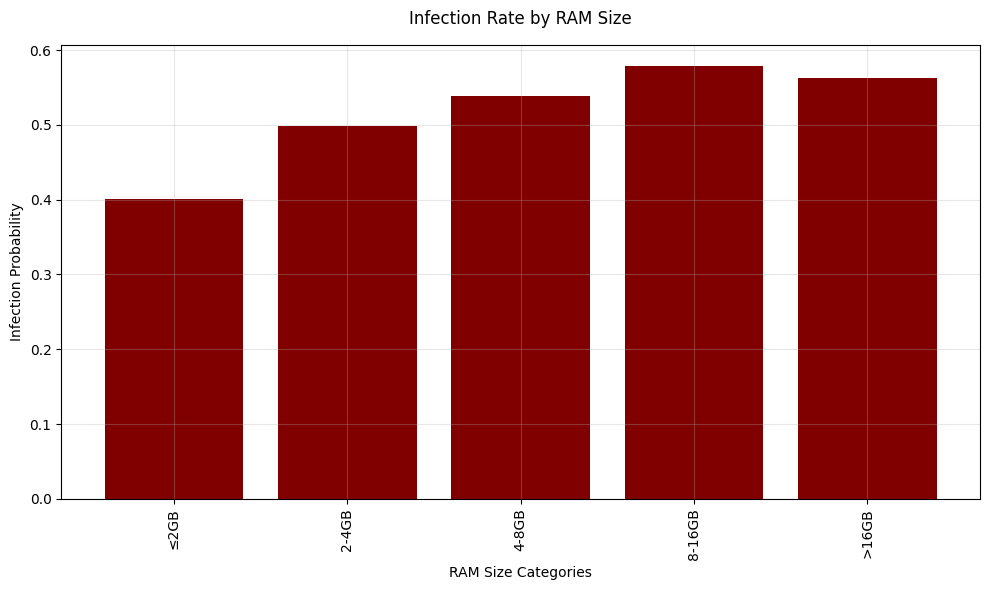

In [135]:
# Second Graph - Infection Rate Analysis with meaningful bins
plt.figure(figsize=(10, 6))
# Add column to df if not present
df['TotalPhysicalRAMMB'] = X_train['TotalPhysicalRAMMB']

# Create RAM categories based on common sizes
df['RAM_category'] = pd.cut(df['TotalPhysicalRAMMB'],
                          bins=[0, 2048, 4096, 8192, 16384, 262144],
                          labels=['≤2GB', '2-4GB', '4-8GB', '8-16GB', '>16GB'])

infection_rates = df.groupby('RAM_category', observed=True)['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by RAM Size', pad=15)
plt.xlabel('RAM Size Categories')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [136]:
mean_imputer = SimpleImputer(strategy='mean')

In [137]:
X_train['TotalPhysicalRAMMB'] = mean_imputer.fit_transform(X_train[['TotalPhysicalRAMMB']])
X_test['TotalPhysicalRAMMB'] = mean_imputer.transform(X_test[['TotalPhysicalRAMMB']])

In [138]:
# 1. Create RAM categories (since there's clear pattern)
def get_ram_risk_category(ram):

    if ram <= 2048:
        return 0    # Low risk (~40% infection)
    elif ram <= 4096:
        return 1    # Medium risk (~50% infection)
    else:
        return 2    # High risk (>55% infection)

# Implementation
X_train['ram_category'] = X_train['TotalPhysicalRAMMB'].apply(get_ram_risk_category)
X_test['ram_category'] = X_test['TotalPhysicalRAMMB'].apply(get_ram_risk_category)

# 2. Create binary flag for high-risk RAM
X_train['high_ram_risk'] = (X_train['TotalPhysicalRAMMB'] > 8192).astype(int)
X_test['high_ram_risk'] = (X_test['TotalPhysicalRAMMB'] > 8192).astype(int)

# 3. Keep original scaled values
scaler = MinMaxScaler()
X_train['ram_scaled'] = scaler.fit_transform(X_train[['TotalPhysicalRAMMB']])
X_test['ram_scaled'] = scaler.transform(X_test[['TotalPhysicalRAMMB']])


In [139]:
# 3 Drop TotalPhysicalRAMMB from both training and test sets
X_train = X_train.drop('TotalPhysicalRAMMB', axis=1)
X_test = X_test.drop('TotalPhysicalRAMMB', axis=1)

## PowerPlatformRole, InternalBatteryNumberOfCharges: Power management, less impact on security.

In [140]:
X_train = X_train.drop('PowerPlatformRole', axis=1)
X_test = X_test.drop('PowerPlatformRole', axis=1)

X_train = X_train.drop('InternalBatteryNumberOfCharges', axis=1)
X_test = X_test.drop('InternalBatteryNumberOfCharges', axis=1)

## NumericOSVersion, OSBranch, OSBuildNumberOnly, OSBuildRevisionOnly, OSEdition, OSSkuFriendlyName, OSInstallType, OSInstallLanguageID, OSUILocaleID, OSGenuineState:  
1. Redundant with OSVersion.
2. Too specific, may lead to overfitting.
3. Specific OS editions, less generalizable.
4. Installation details, less relevant for security.

In [141]:
X_train = X_train.drop('NumericOSVersion', axis=1)
X_test = X_test.drop('NumericOSVersion', axis=1)

X_train = X_train.drop('OSBranch', axis=1)
X_test = X_test.drop('OSBranch', axis=1)

X_train = X_train.drop('OSBuildNumberOnly', axis=1)
X_test = X_test.drop('OSBuildNumberOnly', axis=1)

X_train = X_train.drop('OSBuildRevisionOnly', axis=1)
X_test = X_test.drop('OSBuildRevisionOnly', axis=1)

X_train = X_train.drop('OSEdition', axis=1)
X_test = X_test.drop('OSEdition', axis=1)

X_train = X_train.drop('OSSkuFriendlyName', axis=1)
X_test = X_test.drop('OSSkuFriendlyName', axis=1)

X_train = X_train.drop('OSInstallType', axis=1)
X_test = X_test.drop('OSInstallType', axis=1)

X_train = X_train.drop('OSInstallLanguageID', axis=1)
X_test = X_test.drop('OSInstallLanguageID', axis=1)

X_train = X_train.drop('OSUILocaleID', axis=1)
X_test = X_test.drop('OSUILocaleID', axis=1)

X_train = X_train.drop('OSGenuineState', axis=1)
X_test = X_test.drop('OSGenuineState', axis=1)

## OSArchitecture

In [142]:
X_train["OSArchitecture"].value_counts()

OSArchitecture
amd64    91281
x86       8714
arm64        5
Name: count, dtype: int64

In [143]:
X_test["OSArchitecture"].value_counts()

OSArchitecture
amd64    9141
x86       858
arm64       1
Name: count, dtype: int64

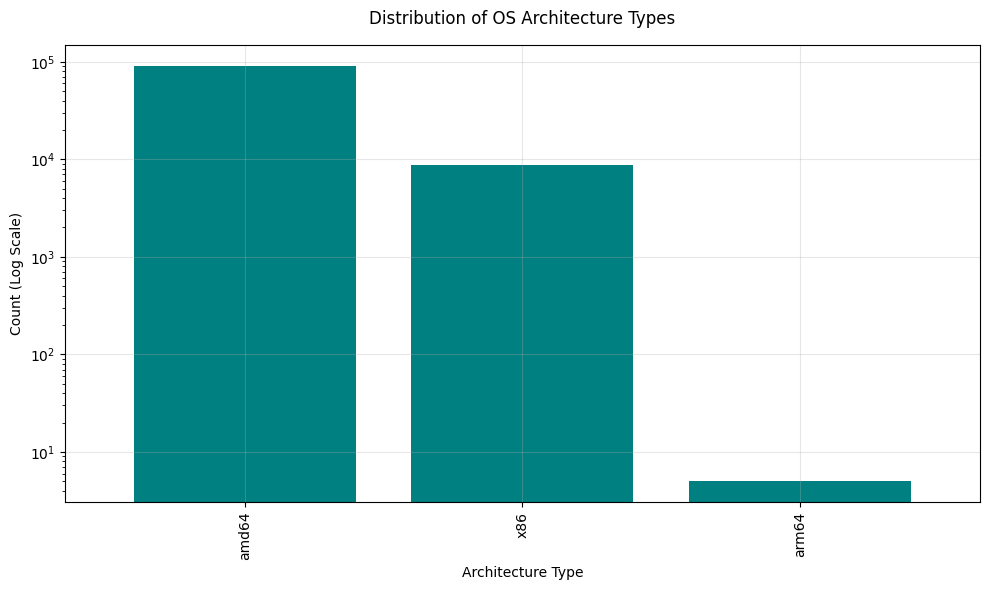

In [144]:
# First Graph - Distribution Plot
plt.figure(figsize=(10, 6))
X_train['OSArchitecture'].value_counts().plot(
    kind='bar',
    color='teal',
    width=0.8
)
plt.title('Distribution of OS Architecture Types', pad=15)
plt.xlabel('Architecture Type')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')  # Using log scale due to large differences
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


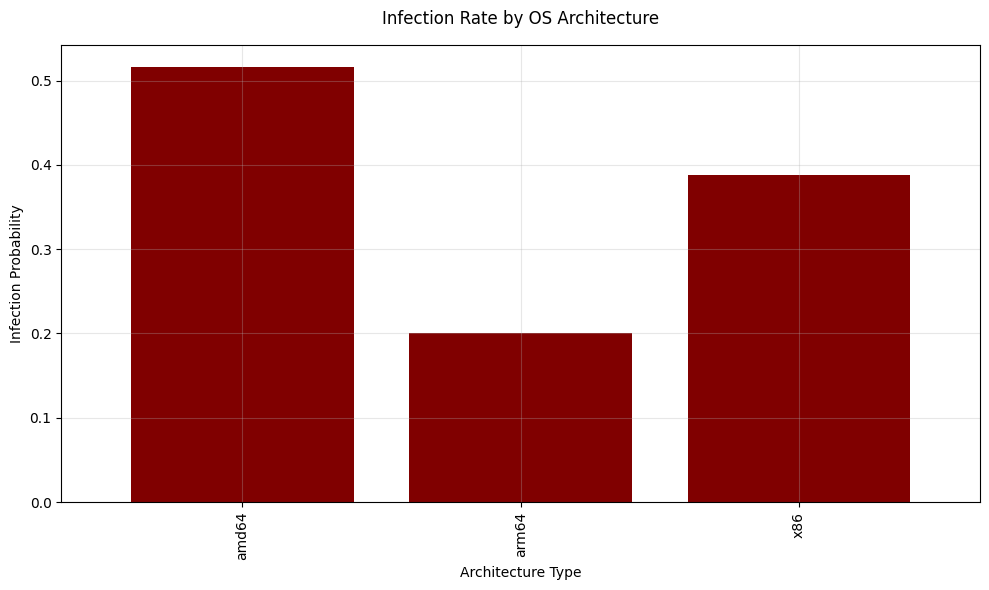

In [145]:
# Second Graph - Infection Rate Analysis
plt.figure(figsize=(10, 6))
# First add column to df if not present
df['OSArchitecture'] = X_train['OSArchitecture']

infection_rates = df.groupby('OSArchitecture', observed=True)['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by OS Architecture', pad=15)
plt.xlabel('Architecture Type')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [146]:
def get_arch_risk(arch):
    if arch == 'amd64':
        return 2
    elif arch == 'x86':
        return 1
    else:
        return 0

# Apply to both sets
X_train['arch_risk'] = X_train['OSArchitecture'].apply(get_arch_risk)
X_test['arch_risk'] = X_test['OSArchitecture'].apply(get_arch_risk)

# 2. Create binary flag for high-risk architecture
X_train['is_amd64'] = (X_train['OSArchitecture'] == 'amd64').astype(int)
X_test['is_amd64'] = (X_test['OSArchitecture'] == 'amd64').astype(int)

# 3. One-hot encoding (since it's categorical with few values)
arch_dummies_train = pd.get_dummies(X_train['OSArchitecture'], prefix='arch')
arch_dummies_test = pd.get_dummies(X_test['OSArchitecture'], prefix='arch')


In [147]:
X_train = X_train.drop('OSArchitecture', axis=1)
X_test = X_test.drop('OSArchitecture', axis=1)

## AutoUpdateOptionsName: Update preferences, covered by OSBuildNumber.

In [148]:
X_train = X_train.drop('AutoUpdateOptionsName', axis=1)
X_test = X_test.drop('AutoUpdateOptionsName', axis=1)

## IsPortableOS

In [149]:
X_train["IsPortableOS"].value_counts()

IsPortableOS
0    99948
1       52
Name: count, dtype: int64

In [150]:
X_test["IsPortableOS"].value_counts()

IsPortableOS
0    9995
1       5
Name: count, dtype: int64

### Dropping IsPortableOS beacuse of it's low variability

In [151]:
X_train = X_train.drop('IsPortableOS', axis=1)
X_test = X_test.drop('IsPortableOS', axis=1)

## LicenseActivationChannel

In [152]:
X_train["LicenseActivationChannel"].value_counts()

LicenseActivationChannel
Retail            52195
OEM:DM            39178
Volume:GVLK        4643
OEM:NONSLP         3884
Volume:MAK           94
Retail:TB:Eval        6
Name: count, dtype: int64

In [153]:
X_test["LicenseActivationChannel"].value_counts()

LicenseActivationChannel
Retail         5171
OEM:DM         3954
Volume:GVLK     469
OEM:NONSLP      401
Volume:MAK        5
Name: count, dtype: int64

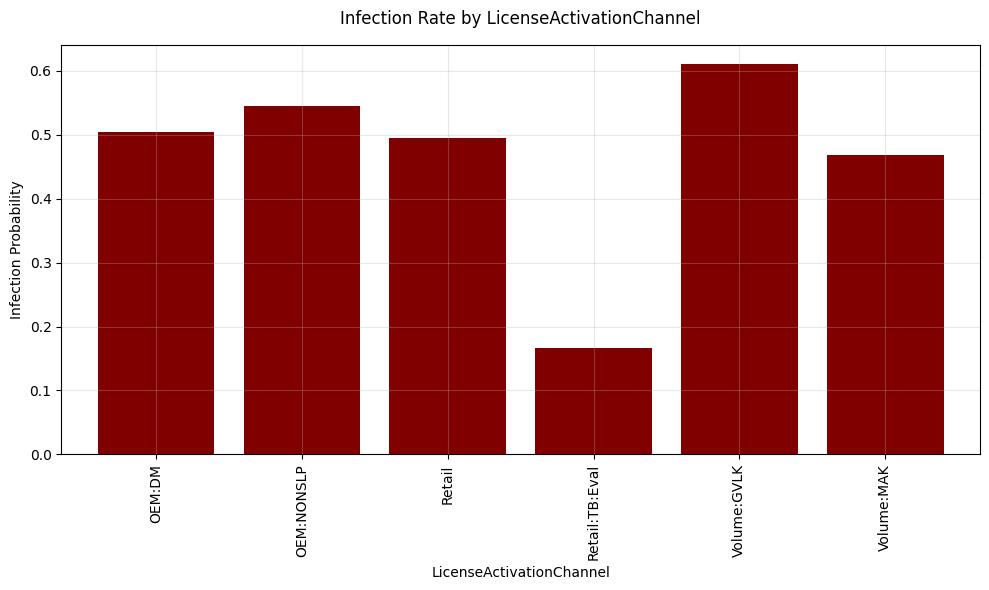

In [154]:
plt.figure(figsize=(10, 6))
# First add column to df if not present

infection_rates = df.groupby('LicenseActivationChannel', observed=True)['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by LicenseActivationChannel', pad=15)
plt.xlabel('LicenseActivationChannel')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Since Reatail: TB : Eval is not present in Test so ignore it, and divinding into 2 categories Medium and High risk categories.

In [155]:
def categorize_license(channel):
    if channel == 'Volume:GVLK':
        return 'High Risk'
    else:
        return 'Medium Risk'

X_train['LicenseRisk'] = X_train['LicenseActivationChannel'].apply(categorize_license)
X_test['LicenseRisk'] = X_test['LicenseActivationChannel'].apply(categorize_license)


In [156]:
encoder = OrdinalEncoder(categories=[['Medium Risk', 'High Risk']])
X_train['LicenseRisk_Encoded'] = encoder.fit_transform(X_train[['LicenseRisk']])
X_test['LicenseRisk_Encoded'] = encoder.transform(X_test[['LicenseRisk']])

# Drop original columns
X_train = X_train.drop(['LicenseActivationChannel', 'LicenseRisk'], axis=1)
X_test = X_test.drop(['LicenseActivationChannel', 'LicenseRisk'], axis=1)


## IsVirtualDevice

In [157]:
X_train["IsVirtualDevice"].value_counts()

IsVirtualDevice
0.0    99596
1.0      384
Name: count, dtype: int64

In [158]:
X_test["IsVirtualDevice"].value_counts()

IsVirtualDevice
0.0    9961
1.0      32
Name: count, dtype: int64

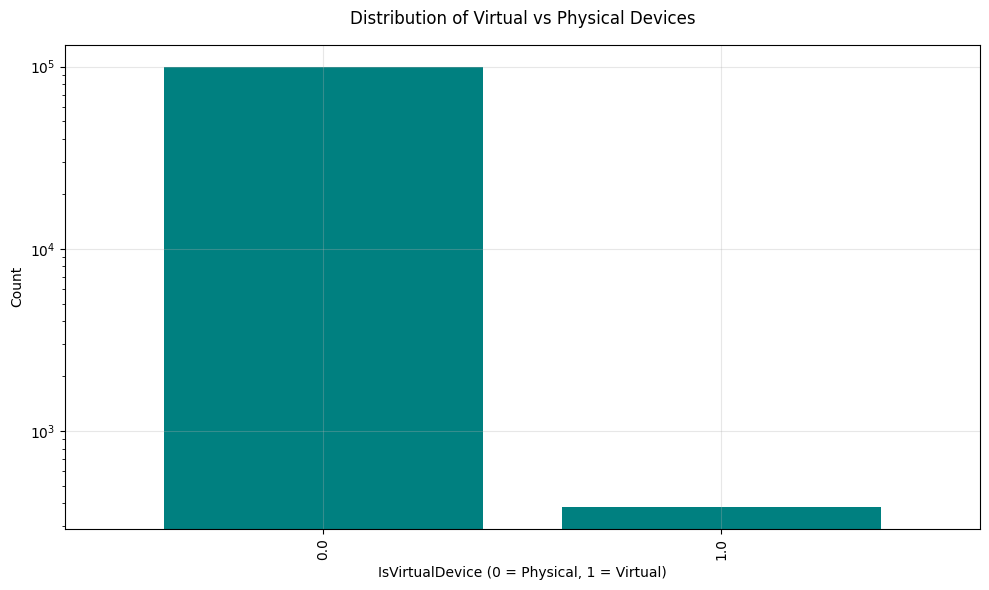

In [159]:
# First Graph - Distribution Plot
plt.figure(figsize=(10, 6))
X_train['IsVirtualDevice'].value_counts().sort_index().plot(
    kind='bar',
    color='teal',
    width=0.8
)
plt.title('Distribution of Virtual vs Physical Devices', pad=15)
plt.xlabel('IsVirtualDevice (0 = Physical, 1 = Virtual)')
plt.ylabel('Count')
plt.yscale('log')  # Using log scale due to large imbalance
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


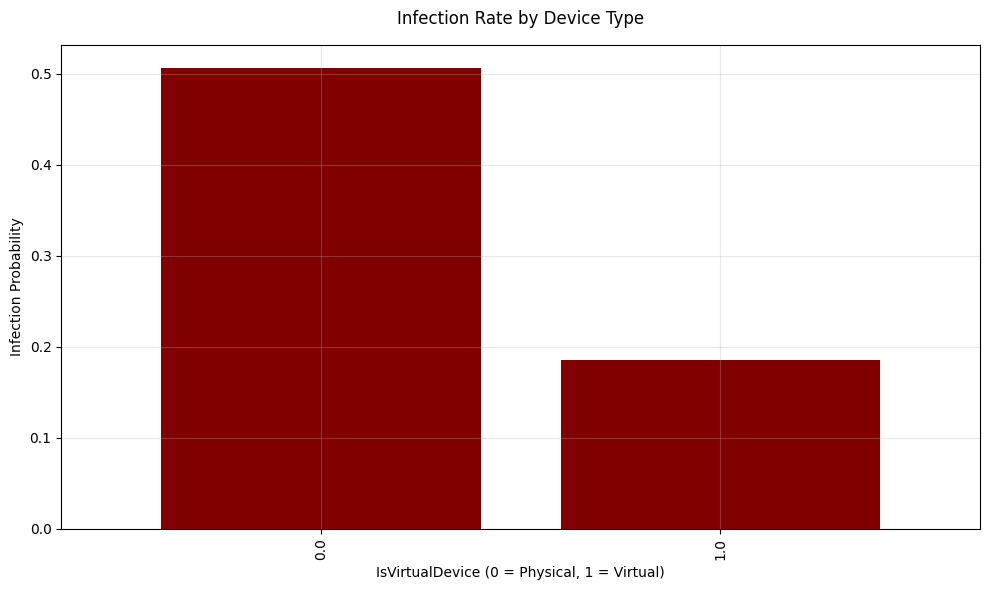

In [160]:
# Second Graph - Infection Rate Analysis
plt.figure(figsize=(10, 6))
# First add column to df if not present
df['IsVirtualDevice'] = X_train['IsVirtualDevice']

infection_rates = df.groupby('IsVirtualDevice', observed=True)['target'].mean()
infection_rates.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by Device Type', pad=15)
plt.xlabel('IsVirtualDevice (0 = Physical, 1 = Virtual)')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Seems an Important Feature So keep it as it is.

## DateOs

In [161]:
X_train["DateOS"].head()

0    2018-04-17
1    2018-08-14
2    2018-09-11
3    2018-01-03
4    2018-09-11
Name: DateOS, dtype: object

In [162]:
X_train['DateOS'] = pd.to_datetime(X_train['DateOS'])
X_test['DateOS'] = pd.to_datetime(X_test['DateOS'])

# extract year and month
X_train['OS_Year'] = X_train['DateOS'].dt.year
X_train['OS_Month'] = X_train['DateOS'].dt.month
X_test['OS_Year'] = X_test['DateOS'].dt.year
X_test['OS_Month'] = X_test['DateOS'].dt.month

# Drop original DateOS column
X_train = X_train.drop(['DateOS'], axis=1)
X_test = X_test.drop(['DateOS'], axis=1)


In [163]:
X_train["OS_Year"].value_counts()

OS_Year
2018.0    81356
2017.0    15219
2016.0     2771
2015.0      630
Name: count, dtype: int64

In [164]:
X_test["OS_Year"].value_counts()

OS_Year
2018.0    8111
2017.0    1544
2016.0     275
2015.0      67
Name: count, dtype: int64

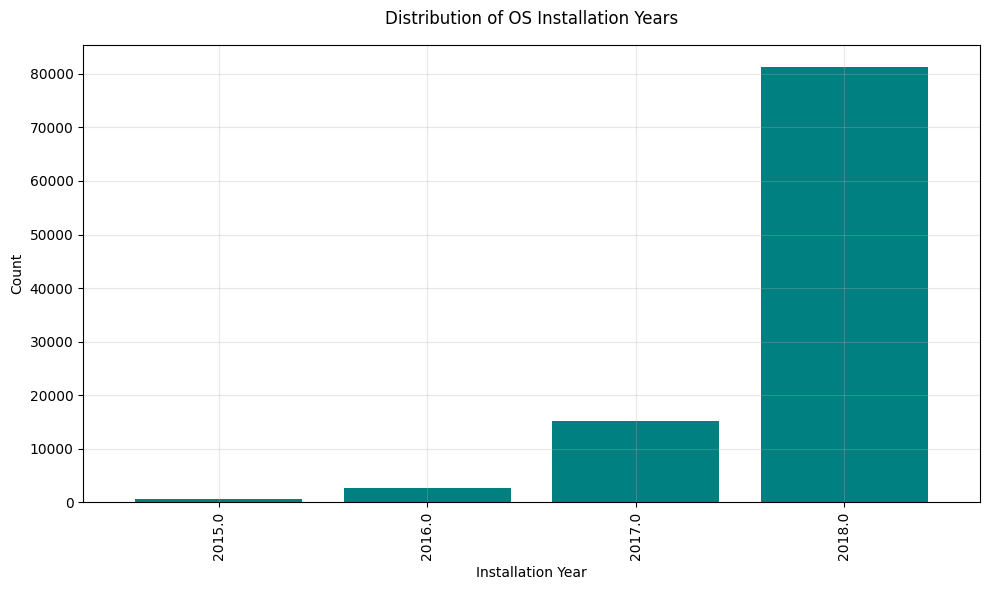

In [165]:
# 1. Year Distribution Plot
plt.figure(figsize=(10, 6))
X_train['OS_Year'].value_counts().sort_index().plot(
    kind='bar',
    color='teal',
    width=0.8
)
plt.title('Distribution of OS Installation Years', pad=15)
plt.xlabel('Installation Year')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


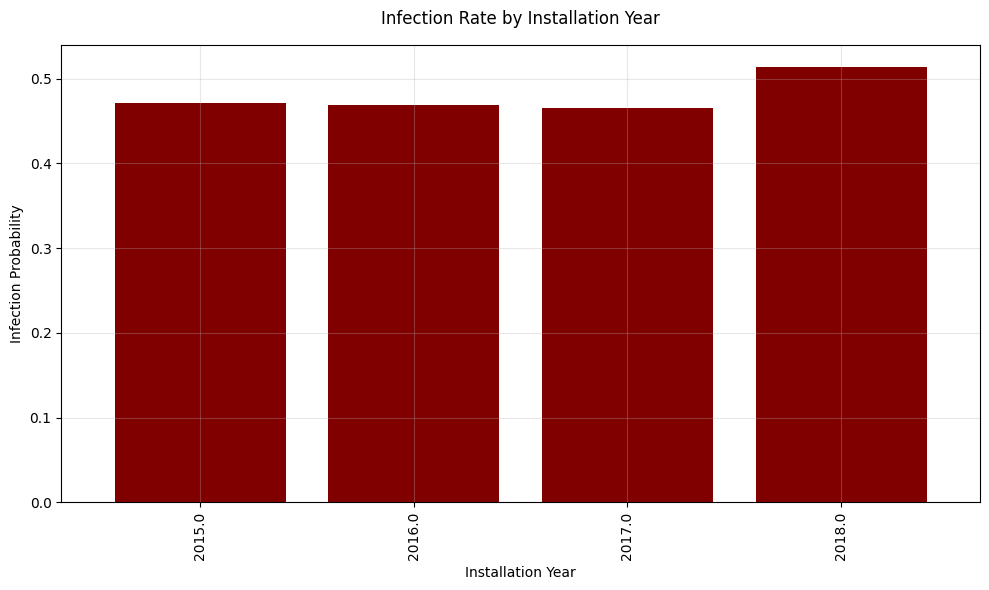

In [166]:
# 2. Year Infection Rate Analysis
plt.figure(figsize=(10, 6))
df['OS_Year'] = X_train['OS_Year']
infection_rates_year = df.groupby('OS_Year', observed=True)['target'].mean()
infection_rates_year.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by Installation Year', pad=15)
plt.xlabel('Installation Year')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


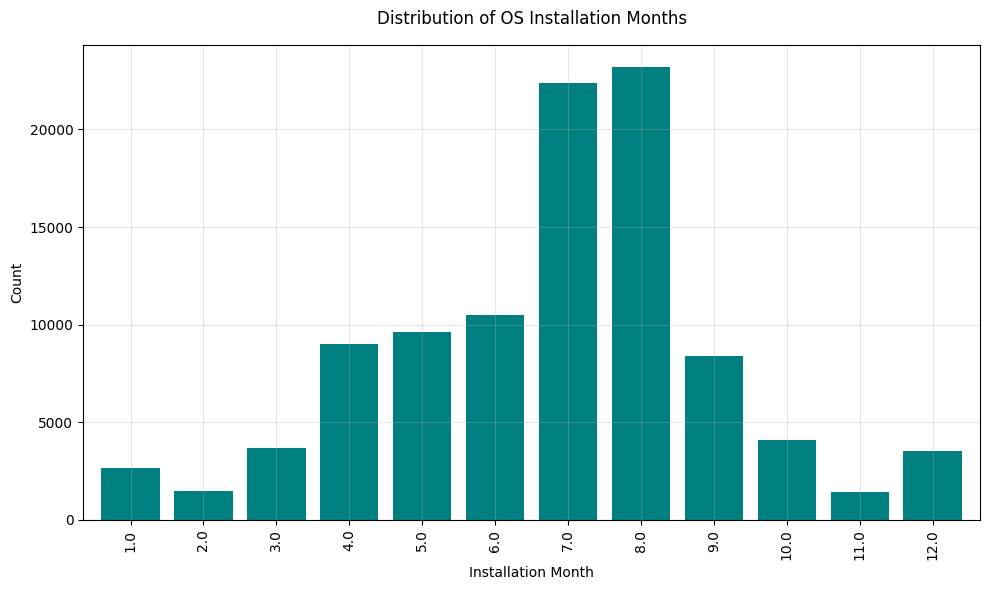

In [167]:
# 3. Month Distribution Plot
plt.figure(figsize=(10, 6))
X_train['OS_Month'].value_counts().sort_index().plot(
    kind='bar',
    color='teal',
    width=0.8
)
plt.title('Distribution of OS Installation Months', pad=15)
plt.xlabel('Installation Month')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


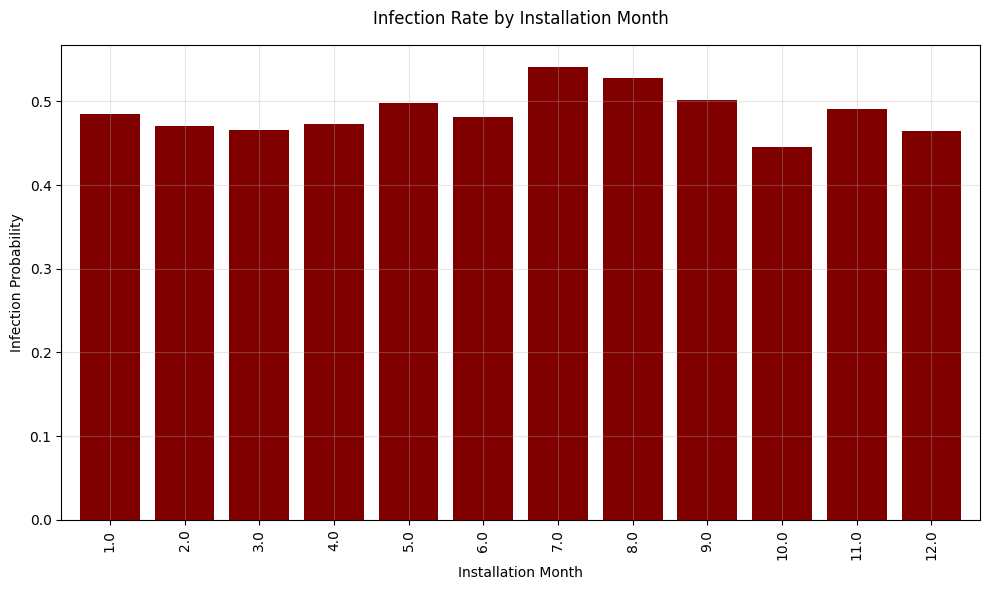

In [168]:
# 4. Month Infection Rate Analysis
plt.figure(figsize=(10, 6))
df['OS_Month'] = X_train['OS_Month']
infection_rates_month = df.groupby('OS_Month', observed=True)['target'].mean()
infection_rates_month.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by Installation Month', pad=15)
plt.xlabel('Installation Month')
plt.ylabel('Infection Probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Droping them as seems irrelevent

In [169]:
X_train = X_train.drop(['OS_Year'], axis=1)
X_test = X_test.drop(['OS_Year'], axis=1)

X_train = X_train.drop(['OS_Month'], axis=1)
X_test = X_test.drop(['OS_Month'], axis=1)

## OSBuildNumber

In [170]:
X_train.value_counts("OSBuildNumber")

OSBuildNumber
17134    45837
16299    29632
15063     8376
14393     7378
10586     3869
10240     3108
9600      1401
7601       226
17744       26
17692       26
17738       20
17735       14
17741       14
17746       14
17758       14
17713       11
17755        7
17751        6
17763        6
17760        5
17672        4
17754        3
17730        2
17686        1
Name: count, dtype: int64

In [171]:
X_test.value_counts("OSBuildNumber")

OSBuildNumber
17134    4559
16299    2961
15063     817
14393     802
10586     370
10240     307
9600      141
7601       27
17738       3
17746       2
17741       2
17758       1
17754       1
17751       1
17728       1
17744       1
17735       1
17713       1
17661       1
18234       1
Name: count, dtype: int64

In [172]:
def categorize_os_build_number(build_number):
    top_7 = [17134, 16299, 15063, 14393, 10586, 10240, 9600]
    return build_number if build_number in top_7 else 'Other'

X_train['OSBuildNumber_Category'] = X_train['OSBuildNumber'].apply(categorize_os_build_number)
X_test['OSBuildNumber_Category'] = X_test['OSBuildNumber'].apply(categorize_os_build_number)

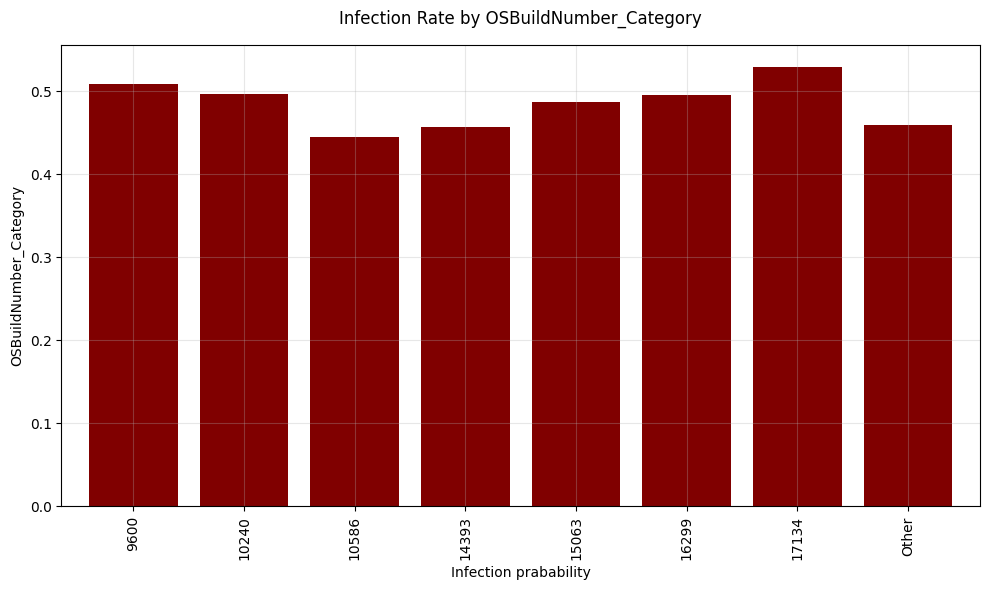

In [173]:
plt.figure(figsize=(10, 6))
df['OSBuildNumber_Category'] = df['OSBuildNumber'].apply(categorize_os_build_number)
infection_rates_year = df.groupby('OSBuildNumber_Category', observed=True)['target'].mean()
infection_rates_year.plot(
    kind='bar',
    color='maroon',
    width=0.8
)
plt.title('Infection Rate by OSBuildNumber_Category', pad=15)
plt.xlabel('Infection prabability')
plt.ylabel('OSBuildNumber_Category')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Since probability are similar thus good idea to drop this feature.

In [174]:
X_train = X_train.drop(['OSBuildNumber'], axis=1)
X_test = X_test.drop(['OSBuildNumber'], axis=1)

X_train = X_train.drop(['OSBuildNumber_Category'], axis=1)
X_test = X_test.drop(['OSBuildNumber_Category'], axis=1)

### Checking reaming features.

In [175]:
X_train.head()

,IsPassiveModeEnabled,NumAntivirusProductsEnabled,IsSystemProtected,ProcessorCoreCount,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,EngineVersion_Risk,is_high_risk,protection_level,single_av,av_risk_category,Processor_Encoded,MDC2FormFactor_Encoded,ram_category,high_ram_risk,ram_scaled,arch_risk,is_amd64,LicenseRisk_Encoded
0,0,1.0,1.0,4.0,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,1,0,2,1,0,1,5,0,0,0.001957,1,0,0.0
1,0,1.0,1.0,4.0,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2,0,2,1,0,2,0,1,0,0.013699,2,1,0.0
2,0,1.0,1.0,4.0,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,1,0,2,1,0,2,2,2,0,0.029354,2,1,0.0
3,0,1.0,1.0,4.0,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,1,0,2,0,1,2,4,2,0,0.029354,2,1,0.0
4,0,1.0,1.0,2.0,0.0,Retail,628.0,13224.0,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,1,0,2,0,1,1,2,0,0,0.005871,1,0,0.0


## Droping Some more irrelevent features

1. **IsFlightsDisabled, FlightRing**: This details which might not be useful to us.
2. **FirmwareManufacturerID, FirmwareVersionID**: These are ID's.
3. **IsTouchEnabled, IsPenCapable**: Not relevant for malware detection as they are input features.
4. **IsAlwaysOnAlwaysConnectedCapable**: Connectivity feature and might not impact malware detaction.
5. **RegionIdentifier**: It is an geographic info.
6. **DateAS**: Specific timestamp, may not generalize well.

In [176]:
X_train = X_train.drop('IsFlightsDisabled', axis=1)
X_test = X_test.drop('IsFlightsDisabled', axis=1)

X_train = X_train.drop('FlightRing', axis=1)
X_test = X_test.drop('FlightRing', axis=1)

X_train = X_train.drop('FirmwareManufacturerID', axis=1)
X_test = X_test.drop('FirmwareManufacturerID', axis=1)

X_train = X_train.drop('FirmwareVersionID', axis=1)
X_test = X_test.drop('FirmwareVersionID', axis=1)

X_train = X_train.drop('IsTouchEnabled', axis=1)
X_test = X_test.drop('IsTouchEnabled', axis=1)

X_train = X_train.drop('IsPenCapable', axis=1)
X_test = X_test.drop('IsPenCapable', axis=1)

X_train = X_train.drop('IsAlwaysOnAlwaysConnectedCapable', axis=1)
X_test = X_test.drop('IsAlwaysOnAlwaysConnectedCapable', axis=1)

X_train = X_train.drop('RegionIdentifier', axis=1)
X_test = X_test.drop('RegionIdentifier', axis=1)

X_train = X_train.drop('DateAS', axis=1)
X_test = X_test.drop('DateAS', axis=1)

In [177]:
X_train.head()

,IsPassiveModeEnabled,NumAntivirusProductsEnabled,IsSystemProtected,ProcessorCoreCount,IsSecureBootEnabled,IsVirtualDevice,IsGamer,EngineVersion_Risk,is_high_risk,protection_level,single_av,av_risk_category,Processor_Encoded,MDC2FormFactor_Encoded,ram_category,high_ram_risk,ram_scaled,arch_risk,is_amd64,LicenseRisk_Encoded
0,0,1.0,1.0,4.0,0,0.0,0.0,1,0,2,1,0,1,5,0,0,0.001957,1,0,0.0
1,0,1.0,1.0,4.0,1,0.0,0.0,2,0,2,1,0,2,0,1,0,0.013699,2,1,0.0
2,0,1.0,1.0,4.0,0,0.0,1.0,1,0,2,1,0,2,2,2,0,0.029354,2,1,0.0
3,0,1.0,1.0,4.0,1,0.0,0.0,1,0,2,0,1,2,4,2,0,0.029354,2,1,0.0
4,0,1.0,1.0,2.0,0,0.0,1.0,1,0,2,0,1,1,2,0,0,0.005871,1,0,0.0


## Handling Null values in preproccesed colunms

In [178]:
X_train["EngineVersion_Risk"].value_counts()

EngineVersion_Risk
1    45219
2    44017
0    10764
Name: count, dtype: int64

In [179]:
null_values = X_train.isnull().sum()
columns_with_nulls = null_values[null_values > 0]
print("Columns with null values:")
print(columns_with_nulls)


Columns with null values:
NumAntivirusProductsEnabled     76
IsSystemProtected               76
ProcessorCoreCount              85
IsVirtualDevice                 20
IsGamer                        559
dtype: int64


In [180]:
null_values = X_test.isnull().sum()
columns_with_nulls = null_values[null_values > 0]
print("Columns with null values:")
print(columns_with_nulls)


Columns with null values:
NumAntivirusProductsEnabled     2
IsSystemProtected               2
ProcessorCoreCount             11
IsVirtualDevice                 7
IsGamer                        62
dtype: int64


In [181]:

# Create two imputers: one for mean and one for median
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# List of columns to impute with median (for discrete or skewed variables)
median_columns = ['NumAntivirusProductsEnabled', 'ProcessorCoreCount']

mode_columns = [
    'IsSystemProtected',
    'IsVirtualDevice',
    'IsGamer'
]


# Impute with median
X_train[median_columns] = median_imputer.fit_transform(X_train[median_columns])
X_test[median_columns] = median_imputer.transform(X_test[median_columns])

X_train[mode_columns] = mode_imputer.fit_transform(X_train[mode_columns])
X_test[mode_columns] = mode_imputer.transform(X_test[mode_columns])

# Verify that all null values have been imputed
print("Remaining null values:")
print(X_train.isnull().sum())


Remaining null values:
IsPassiveModeEnabled           0
NumAntivirusProductsEnabled    0
IsSystemProtected              0
ProcessorCoreCount             0
IsSecureBootEnabled            0
IsVirtualDevice                0
IsGamer                        0
EngineVersion_Risk             0
is_high_risk                   0
protection_level               0
single_av                      0
av_risk_category               0
Processor_Encoded              0
MDC2FormFactor_Encoded         0
ram_category                   0
high_ram_risk                  0
ram_scaled                     0
arch_risk                      0
is_amd64                       0
LicenseRisk_Encoded            0
dtype: int64


# Spliting of Data

In [182]:

#X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)
y_train = y

# Model Predictions

# Random Forest
## Score: 0.59820

### Making param grid, later we will use Randomized Search CV to find best params.

In [183]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

### Creating a Random Forest classifier

In [184]:
# rf = RandomForestClassifier(random_state=42)

### Set up RandomizedSearchCV and finding best params

In [185]:
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_grid,
#     n_iter=10,
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit the random search
# random_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best parameters:", random_search.best_params_)

## Using the confirmed best parameters to train Random Forest.

In [186]:
#
# best_params = {
#     'n_estimators': 100,
#     'min_samples_split': 2,
#     'min_samples_leaf': 1,
#     'max_depth': 10
# }

# # Create and train model with these parameters
# best_rf = RandomForestClassifier(**best_params, random_state=42)
# best_rf.fit(X_train, y_train)

### Predicting on test dataset

In [187]:
# test_predictions = best_rf.predict(X_test)

In [188]:
# sub = pd.read_csv('/kaggle/input/System-Threat-Forecaster/sample_submission.csv')
# sub['target'] = test_predictions
# sub.to_csv('submission.csv', index = False)
# op = pd.read_csv("submission.csv")
# print(op.head())  # Add ()

# Creating XGBoost model with the best parameters
## Score: 0.60230

### Making param grid, later we will use Randomized Search CV to find best params.

In [189]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5, 6],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.7, 0.8, 0.9]
# }

### Set up RandomizedSearchCV and finding best params

In [190]:
# xgb_random = RandomizedSearchCV(
#     XGBClassifier(random_state=42),
#     param_distributions=param_grid,
#     n_iter=20,
#     cv=3,
#     random_state=42,
#     n_jobs=-1
# )

# xgb_random.fit(X_train, y_train)
# print("Best parameters:", xgb_random.best_params_)

### Creating a XGB classifier model

In [198]:

xgb_model = XGBClassifier(
    subsample=0.7,
    n_estimators=100,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Train model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Making predictions

In [192]:
test_predictions = xgb_model.predict(X_test)

# Save predictions
sub = pd.read_csv('/kaggle/input/System-Threat-Forecaster/sample_submission.csv')
sub['target'] = test_predictions
sub.to_csv('submission.csv', index=False)

# LGBMClassifier
## Score: 0.60120

### Making param grid, later we will use Randomized Search CV to find best params.

In [193]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'num_leaves': [31, 50, 70],
#     'max_depth': [3, 4, 5, -1],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

### Setting up RandomizedSearchCV and finding best params

In [194]:
# lgb_random = RandomizedSearchCV(
#     LGBMClassifier(random_state=42),
#     param_distributions=param_grid,
#     n_iter=20,
#     cv=3,
#     random_state=42,
#     n_jobs=-1
# )

# lgb_random.fit(X_train, y_train)
# print("Best parameters:", lgb_random.best_params_)

### Creating a LGMB classifier model

In [195]:
# best_params = {
#     'subsample': 0.9,
#     'num_leaves': 50,
#     'n_estimators': 200,
#     'max_depth': 3,
#     'learning_rate': 0.3,
#     'colsample_bytree': 0.8
# }

# # You can now use these parameters to train your final model:
# lgb_model = LGBMClassifier(**best_params, random_state=42)
# lgb_model.fit(X_train, y_train)

# # Make predictions
# test_predictions = lgb_model.predict(X_test)

# best_params = {
#     'subsample': 0.9,
#     'num_leaves': 70,
#     'n_estimators': 200,
#     'max_depth': 4,
#     'learning_rate': 0.1,
#     'colsample_bytree': 0.9
# }

# # You can now use these parameters to train your final model:
# lgb_model = LGBMClassifier(**best_params, random_state=42)
# lgb_model.fit(X_train, y_train)

# # Make predictions
# test_predictions = lgb_model.predict(X_test)

### Making Predictions

In [196]:
# # Save predictions
# sub = pd.read_csv('/kaggle/input/System-Threat-Forecaster/sample_submission.csv')
# sub['target'] = test_predictionsm
# sub.to_csv('submission.csv', index=False)

### Printing Predictions

In [197]:
# op = pd.read_csv("submission.csv")
# print(op.head())  # Add ()